**4장 – 모델 훈련**

다음은 본 장의 핵심 내용입니다.

1. **머신러닝 모델 이해의 중요성**:
   - 머신러닝 모델과 학습 알고리즘은 전통적으로 "블랙박스"처럼 취급되어 왔습니다. 하지만 이러한 모델의 작동 방식을 이해하면 적절한 모델과 알고리즘을 선택하고, 최적의 하이퍼파라미터를 효율적으로 찾을 수 있습니다.

2. **모델 학습 방법**:
   - 두 가지 주요 학습 방법이 소개됩니다:
     - **단일 형태의 방정식(Closed-form Equation)**: 수학적 공식을 사용해 비용 함수(Cost Function)를 최소화하는 모델 파라미터를 직접 계산하는 방법입니다. 주로 간단한 모델에서 사용됩니다.
     - **경사 하강법(Gradient Descent, GD)**: 비용 함수를 최소화하기 위해 모델 파라미터를 점진적으로 조정하는 반복적 최적화 방법입니다. 배치 경사 하강법(Batch GD), 미니 배치 경사 하강법(Mini-batch GD), 확률적 경사 하강법(Stochastic GD) 등의 변형 방법도 언급됩니다.

3. **복잡한 모델로의 확장**:
   - 선형 모델에서 시작해 비선형 데이터셋을 처리하기 위한 다항 회귀와 같은 더 복잡한 모델로 확장할 때, 학습 곡선(Learning Curve)을 사용해 모델이 과대적합되는지 모니터링하는 방법이 설명됩니다.

4. **규제(Regularization) 기법**:
   - 과대적합을 방지하기 위해 여러 규제 기법이 적용될 수 있으며, 이러한 기법들은 이후의 장에서 다뤄질 예정입니다.

5. **로지스틱 회귀와 소프트맥스 회귀**:
   - 분류 작업에서 널리 사용되는 로지스틱 회귀와 소프트맥스 회귀 모델도 이후에 설명될 것입니다.

**주의 사항**:
   - 이 장에서는 선형대수와 미분 기호를 사용하는 수학적 표현이 많이 등장하므로, 벡터, 행렬, 역행렬, 편미분과 같은 개념에 익숙해질 필요가 있습니다. 이러한 개념이 어렵다면 GitHub에서 제공하는 튜토리얼을 참고할 것을 권장합니다.

# 설정

이 프로젝트에는 파이썬 3.7 이상이 필요합니다:

In [22]:
import sys

assert sys.version_info >= (3, 7)

또한 사이킷런 ≥ 1.0.1이 필요합니다:

In [23]:
from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

이전 챕터에서 했던 것처럼 기본 글꼴 크기를 정의하여 그림을 더 예쁘게 만들어 보겠습니다:

In [24]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

그리고 `images/training_linear_models` 폴더(아직 존재하지 않는 경우)를 만들고, 이 노트북을 통해 책에 사용할 그림을 고해상도로 저장하는 데 사용되는 `save_fig()` 함수를 정의해 보겠습니다:

In [25]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "training_linear_models"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
#     plt.savefig(path, format=fig_extension, dpi=resolution)

# 선형 회귀

- **모델 소개**: 삶의 만족도를 예측하기 위한 간단한 선형 회귀 모델이 소개됩니다. 이 모델은 1인당 GDP를 입력 변수로 사용하여 예측합니다.
- **모델 공식**: 

$ \text{삶의 만족도} = \theta_0 + \theta_1 \times 1인당\_GDP $

- 이 모델에서 $\theta_0$와 $\theta_1$은 모델 파라미터입니다.

2. **일반적인 선형 회귀 모델**:
   - **일반식 (식 4-1)**: 
     $
     \hat{y} = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \cdots + \theta_n x_n
     $
   - **요소 설명**:
     - $\hat{y}$: 예측값
     - $n$: 특성의 수
     - $x_i$: $i$번째 특성 값
     - $\theta_j$: $j$번째 모델 파라미터 (편향 $\theta_0$ 포함)

3. **벡터 형식으로 표현**:
   - **벡터화된 공식 (식 4-2)**:
     $
     \hat{y} = h_\theta(x) = \theta^T \cdot x
     $
   - **벡터 설명**:
     - $h_\theta(x)$: 모델 파라미터 $\theta$를 사용한 가설 함수
     - $\theta$: 편향 $\theta_0$과 특성의 가중치를 담은 모델의 파라미터 벡터
     - $x$: $x_0$에서 $x_n$까지 담은 샘플의 특성 벡터 (항상 $x_0 = 1$)
     - $\theta^T \cdot x$: $\theta$와 $x$의 점곱 연산

4. **모델 훈련**:
   - **목적**: 훈련 데이터를 가장 잘 맞추는 파라미터 $\theta$를 찾는 것.
   - **평가지표**: 평균 제곱 오차 (RMSE)를 최소화하는 것이 목표입니다.

5. **MSE 비용 함수**:
   - **공식 (식 4-3)**:
   
     $
     MSE(X, h_\theta) = \frac{1}{m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)})^2
     $
   - **설명**: MSE는 모델의 예측과 실제 값을 비교하여 오차를 측정합니다.

## 정규 방정식

- 비용 함수를 최소화하는 $\theta$ 값을 찾기 위한 **해석적인 방법**이 정규 방정식으로, 다음과 같이 표현됩니다:

$
 \hat{\theta} = (X^T X)^{-1} X^T y \quad \text{(식 4-4)}
$

- $\hat{\theta}$는 비용 함수를 최소화하는 $\theta$ 값입니다.
- $y$는 $y^{(1)}$부터 $y^{(m)}$까지 포함하는 타깃 벡터입니다.

위의 정규 방정식을 테스트하기 위해, 선형적인 형태를 보이는 데이터를 생성합니다:

In [26]:
import numpy as np

np.random.seed(42)  # 코드 예제를 재현 가능하게 만들기 위해
m = 100  # 샘플 개수
X = 2 * np.random.rand(m, 1)  # 열 벡터
y = 4 + 3 * X + np.random.randn(m, 1)  # 열 벡터

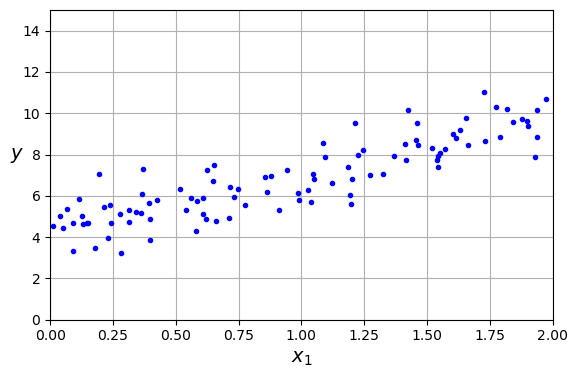

In [27]:
# 추가 코드 - 그림 4-1 생성 및 저장

import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()
save_fig("generated_data_plot")
plt.show()

**정규 방정식을 사용하여 $\theta$ 계산**:
   - **numpy**의 선형대수 모듈(`np.linalg`)에서 `inv()` 함수를 사용해 역행렬을 계산하고, `dot()` 메서드를 사용해 행렬 곱셈을 수행합니다
   - 데이터 생성을 위해 사용한 함수는 $y = 4 + 3x_1 + \text{가우스 잡음}$이며, 정규 방정식으로 계산한 $\theta$ 값을 확인합니다:

In [28]:
from sklearn.preprocessing import add_dummy_feature

X_b = add_dummy_feature(X)  # 각 샘플에 x0 = 1을 추가합니다.
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

In [29]:
theta_best

array([[4.21509616],
       [2.77011339]])

**@ 연산자에 대한 설명**:
   - @ 연산자는 **행렬 곱셈**을 수행합니다. 
   - 예를 들어, A와 B가 numpy 배열인 경우, `A @ B`는 `np.matmul(A, B)`와 동일합니다. 
   - 이는 텐서플로, 파이토치 등 다른 많은 라이브러리에서도 지원됩니다. 
   - 하지만 순수 파이썬 배열이나 리스트의 리스트에는 사용할 수 없습니다.
   
**예측 값 확인**:
   - $\theta_0 = 4.215$ 와 $\theta_1 = 2.770$ 대신 기대했던 값은 $\theta_0 = 4$, $\theta_1 = 3$이었습니다. 
   - 모델 파라미터가 완벽하게 재현되지 못한 이유는 데이터셋이 작고 잡음이 많아서 정확한 값을 얻기 어렵기 때문입니다.   

**예측 계산**

In [30]:
X_new = np.array([[0], [2]])
X_new_b = add_dummy_feature(X_new)  # 각 샘플에 x0 = 1을 추가합니다.
y_predict = X_new_b @ theta_best
y_predict

array([[4.21509616],
       [9.75532293]])

- 모델의 예측을 그래프로 나타낸 결과 (그림 4-2):

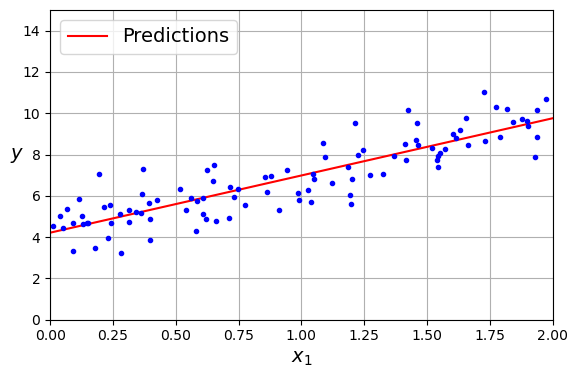

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))  # 추가 코드
plt.plot(X_new, y_predict, "r-", label="Predictions")
plt.plot(X, y, "b.")

# 추가 코드 - 그림 4-2를 꾸미고 저장합니다.
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()
plt.legend(loc="upper left")
save_fig("linear_model_predictions_plot")

plt.show()

- 사이킷런을 사용해 선형 회귀를 수행하는 것은 비교적 간단합니다

In [32]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [33]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

- **scipy의 `lstsq()` 함수 사용**:
    - **scipy.linalg.lstsq()** 함수는 최소 제곱법을 사용해 선형 회귀 문제를 해결하며, 사이킷런의 LinearRegression 클래스도 이 함수에 기반합니다. 
    - `LinearRegression` 클래스는 `scipy.linalg.lstsq()` 함수("least squares"의 약자)를 사용하므로 이 함수를 직접 사용할 수 있습니다:
    - 다음과 같이 호출할 수 있습니다:

In [34]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.21509616],
       [2.77011339]])

- 이 함수는 $\mathbf{X}^+\mathbf{y}$을 계산합니다. 
- $\mathbf{X}^{+}$는 $\mathbf{X}$의 _유사역행렬_ (pseudoinverse)입니다 (Moore–Penrose 유사역행렬입니다). 
- `np.linalg.pinv()`을 사용해서 유사역행렬을 직접 계산할 수 있습니다:

In [35]:
np.linalg.pinv(X_b) @ y

array([[4.21509616],
       [2.77011339]])

- 유사역행렬은 SVD(Singular Value Decomposition)라는 특이값 분해 기법을 사용해 계산됩니다. 
- SVD는 훈련 세트 행렬 $X$를 3개의 행렬 곱셈 $U\Sigma V^T$로 분해합니다. 
- 유사역행렬은 $X^+ = V\Sigma^+ U^T$로 계산됩니다. 
- $\Sigma^+$는 $\Sigma$의 대각 성분 중에서 매우 작은 값을 0으로 변환한 뒤 역수로 치환해 계산합니다.

- **유사역행렬의 장점**:
   - $m < n$이거나 어떤 특성이 중복되어 행렬 $X^T X$의 역행렬이 존재하지 않을 경우, 정규 방정식은 작동하지 않습니다. 
   - 그러나 유사역행렬은 항상 구할 수 있습니다.

## 계산 복잡도

1. **정규 방정식의 계산 복잡도**:
   - 정규 방정식은 $(n+1) \times (n+1)$ 크기의 $X^T X$의 역행렬을 계산합니다. 여기서 $n$은 특성 수입니다.
   - 일반적으로 계산 복잡도는 $O(n^2.4)$에서 $O(n^3)$ 사이이며, 특성 수가 두 배로 늘어나면 계산 시간은 약 8배 증가합니다.

2. **SVD 방법의 계산 복잡도**:
   - 사이킷런의 LinearRegression 클래스가 사용하는 SVD 방법의 계산 복잡도는 약 $O(n^2)$입니다.
   - 특성의 개수가 두 배로 늘어나면 계산 시간은 대략 4배가 됩니다.

3. **주의 사항**:
   - 정규 방정식과 SVD 방법 모두 특성 수가 많아지면(예: 100,000) 매우 느려질 수 있습니다.
   - 반면, 샘플 수에 대해서는 선형적으로 증가합니다 ($O(m)$).
   - 따라서 메모리 공간이 허락된다면, 훈련 세트를 효율적으로 처리할 수 있습니다.

4. **선형 회귀 모델의 예측**:
   - 정규 방정식이나 다른 알고리즘으로 학습된 선형 회귀 모델은 예측이 매우 빠릅니다. 예측 계산 복잡도는 샘플 수와 특성 수에 선형적입니다.
   - 샘플 수나 특성 수가 두 배로 늘어나면 예측 시간도 거의 두 배 증가합니다.

# 경사 하강법

**경사 하강법**은 여러 종류의 문제에서 최적의 해법을 찾을 수 있는 일반적인 최적화 알고리즘입니다. 경사 하강법의 기본 아이디어는 비용 함수를 최소화하기 위해 반복해서 파라미터를 조정하는 것입니다.

1. **경사 하강법의 원리**:
   - 임의의 값(랜덤 초기화)으로 시작해 비용 함수(예: MSE)가 감소되는 방향으로 파라미터 벡터 $\theta$를 업데이트합니다.
   - 경사 하강법은 비용 함수의 현재 **그래디언트(gradient)** 를 계산하고, 그 그래디언트가 감소하는 방향으로 진행하여 최솟값에 도달합니다.

2. **학습률(learning rate, $\eta$)**:
   - 경사 하강법에서 중요한 하이퍼파라미터로 학습률이 있습니다. 학습률은 스텝(step)의 크기를 결정하며, 너무 작으면 학습 속도가 느리고, 너무 크면 최적값을 지나쳐버릴 수 있습니다.
   - 학습률이 너무 작을 경우(그림 4-4)는 많은 반복이 필요하게 되며, 시간이 오래 걸립니다.
   
<img src='img/fig_04_04.png' width=600>
     
   - 반면, 학습률이 너무 크면(그림 4-5), 알고리즘이 최적값을 지나치며 오히려 비용이 증가할 수 있습니다.

<img src='img/fig_04_05.png' width=600>

3. **지역 최솟값과 전역 최솟값**:
   - 경사 하강법은 비용 함수가 볼록(convex)하지 않은 경우, 지역 최솟값에 수렴할 위험이 있습니다(그림 4-6). 
   - 다행히 선형 회귀에서 MSE 비용 함수는 볼록 함수이므로, 경사 하강법이 전역 최솟값에 도달할 수 있습니다.   
   
<img src='img/fig_04_06.png' width=600>   


4. **특성의 스케일 조정**:
   - 경사 하강법을 사용할 때는 **특성의 스케일을 조정**하는 것이 중요합니다. 
   - 이를 통해 경사 하강법이 최적값으로 빠르게 수렴할 수 있습니다(그림 4-7). 
   - 특성의 스케일이 달라지면 비용 함수의 형태가 비대칭적으로 변하여 학습이 어려워질 수 있기 때문입니다.
   - 경사 하강법을 사용할 때는 반드시 모든 특성의 스케일을 동일하게 만들어주는 `StandardScaler`와 같은 전처리 방법을 사용하는 것이 좋습니다.
   
<img src='img/fig_04_07.png' width=600> 

5. **파라미터 공간**:
   - 경사 하강법은 모델의 파라미터 공간에서 최솟값을 찾아가는 과정으로 볼 수 있습니다. 파라미터 공간의 차원이 커지면, 그 탐색이 매우 어려워집니다.

이와 같이 경사 하강법은 다양한 문제에 적용될 수 있는 매우 유용한 최적화 기법이지만, 올바른 하이퍼파라미터 설정과 전처리 과정을 통해 그 성능을 최대화할 수 있습니다. 이 장에서는 경사 하강법의 기본 원리부터 학습률의 중요성, 스케일 조정의 필요성까지 상세히 설명하고 있습니다.

## 배치 경사 하강법

- **경사 하강법**을 구현하려면 각 모델 파라미터 $\theta_j$에 대해 비용 함수의 **그래디언트(gradient)** 를 계산해야 합니다. 
- 이는 $\theta_j$가 조금 변경될 때 비용 함수가 얼마나 바뀌는지를 계산하는 것으로, 이를 **편도함수(partial derivative)** 라고 합니다. 
- 마치 산의 기울기를 느끼며 방향을 정하는 것과 유사합니다.

**편도함수와 그래디언트 벡터**

- **편도함수** 는 비용 함수 $MSE(\theta)$에 대해 $\theta_j$에 대한 미분으로 정의되며, 식은 다음과 같습니다:

  $
  \frac{\partial}{\partial \theta_j} MSE(\theta) = \frac{2}{m} \sum_{i=1}^{m} \left(\theta^T \mathbf{x}^{(i)} - y^{(i)}\right) x_j^{(i)} \quad \text{(식 4-5)}
  $

- **그래디언트 벡터** 는 모든 파라미터 $\theta_j$에 대해 편도함수를 계산하여 벡터로 나타낸 것입니다:

  $
  \nabla_{\theta} MSE(\theta) = \frac{2}{m} \mathbf{X}^T (\mathbf{X} \theta - \mathbf{y}) \quad \text{(식 4-6)}
  $
  
- 경사 하강법의 기본 아이디어는 현재의 $\theta$에서 그래디언트 벡터를 계산한 후, 학습률 $\eta$를 곱한 값만큼 반대 방향으로 이동하는 것입니다. 이 과정을 반복하여 비용 함수가 최소화되는 $\theta$ 값을 찾습니다:

  $
  \theta_{\text{next step}} = \theta - \eta \nabla_{\theta} MSE(\theta) \quad \text{(식 4-7)}
  $  


In [36]:
eta = 0.1  # 학습률
n_epochs = 1000
m = len(X_b)  # 샘플 개수

np.random.seed(42)
theta = np.random.randn(2, 1)  # 모델 파라미터를 랜덤하게 초기화합니다

for epoch in range(n_epochs): # 훈련 세트를 한 번 반복하는 것을 에포크 라고 한다
    gradients = 2 / m * X_b.T @ (X_b @ theta - y)
    theta = theta - eta * gradients

- 이 과정은 **에포크(epoch)**라 불리며, 훈련 세트를 한 번 모두 반복하는 것을 의미합니다.
- 이 구현은 정규 방정식으로 찾은 값과 동일한 $\theta$ 값을 얻었으며, 경사 하강법이 잘 작동함을 확인할 수 있습니다.

학습된 모델 파라미터:

In [37]:
theta

array([[4.21509616],
       [2.77011339]])

**학습률 $\eta$의 영향**

- 그림 4-8에서 학습률이 다른 세 가지 경우의 경사 하강법 결과를 보여줍니다:
  - **$\eta = 0.02$**: 학습률이 너무 낮아 알고리즘이 최적점에 도달하지만 시간이 오래 걸립니다.
  - **$\eta = 0.1$**: 적절한 학습률로 알고리즘이 빠르게 최적점에 도달합니다.
  - **$\eta = 0.5$**: 학습률이 너무 높아 알고리즘이 최적점에 도달하지 못하고 오히려 발산합니다.  

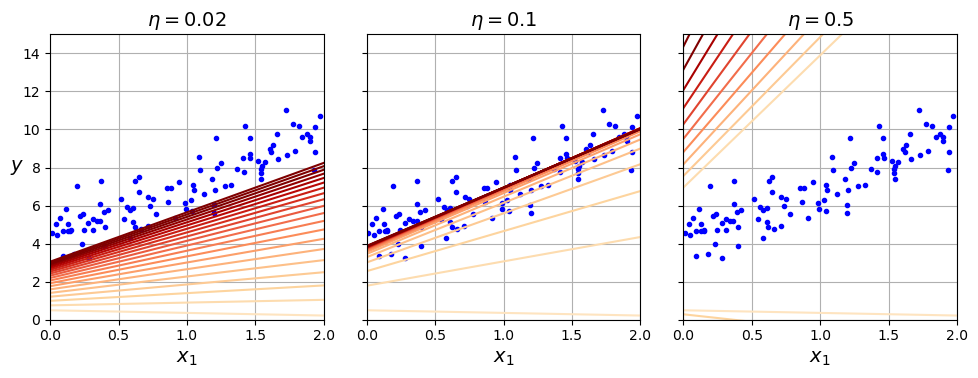

In [38]:
# 추가 코드 - 그림 4-8을 생성하고 저장합니다.

import matplotlib as mpl

def plot_gradient_descent(theta, eta):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_epochs = 1000
    n_shown = 20
    theta_path = []
    for epoch in range(n_epochs):
        if epoch < n_shown:
            y_predict = X_new_b @ theta
            color = mpl.colors.rgb2hex(plt.cm.OrRd(epoch / n_shown + 0.15))
            plt.plot(X_new, y_predict, linestyle="solid", color=color)
        gradients = 2 / m * X_b.T @ (X_b @ theta - y)
        theta = theta - eta * gradients
        theta_path.append(theta)
    plt.xlabel("$x_1$")
    plt.axis([0, 2, 0, 15])
    plt.grid()
    plt.title(fr"$\eta = {eta}$")
    return theta_path

np.random.seed(42)
theta = np.random.randn(2, 1)  # 랜덤 초기화

plt.figure(figsize=(10, 4))
plt.subplot(131)
plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0)
plt.subplot(132)
theta_path_bgd = plot_gradient_descent(theta, eta=0.1)
plt.gca().axes.yaxis.set_ticklabels([])
plt.subplot(133)
plt.gca().axes.yaxis.set_ticklabels([])
plot_gradient_descent(theta, eta=0.5)
save_fig("gradient_descent_plot")
plt.show()

**수렴률(tolerance)과 반복 횟수**

- 적절한 학습률을 찾기 위해 **그리드 서치**를 사용할 수 있습니다. 그러나 학습률이 너무 낮으면 알고리즘이 최적점에 도달하기 전에 멈추게 되고, 너무 크면 모델 파라미터가 크게 변하지 않아 비효율적입니다.
- 해결책으로는 반복 횟수를 적절히 지정하거나, **허용 오차** $\epsilon$를 설정하여 그 이하로 그래디언트 벡터의 크기가 줄어들면 알고리즘을 멈추게 하는 것입니다.
- 일반적으로 비선형 함수에서 학습률 $\eta$를 줄이면 수렴 속도는 느려지지만 더 정확한 최적값에 도달할 수 있습니다.

## 확률적 경사 하강법

- **배치 경사 하강법**의 가장 큰 문제는 매 스텝에서 전체 훈련 세트를 사용해 그래디언트를 계산하여, 훈련 세트가 커질수록 매우 느려집니다.
- 반면에 **확률적 경사 하강법**(SGD)은 매 스텝에서 한 개의 샘플을 랜덤으로 선택해 그 샘플에 대한 그래디언트를 계산합니다.

**SGD의 주요 특징**:
1. **효율성**:
   - 배치 경사 하강법에 비해 훨씬 빠르게 실행됩니다. 
   - 매 반복에서 하나의 샘플만 메모리에 로드하면 되기 때문에 매우 큰 훈련 세트도 처리할 수 있습니다.
2. **불안정성**:
   - SGD는 배치 경사 하강법보다 훨씬 불안정합니다. 
   - 비용 함수가 감소하긴 하지만, 평균적으로 감소하는 대신 무작위성을 띠기 때문에 계속 요동칩니다. 
   - 하지만 시간이 지나면 최솟값에 근접하게 되며, 전역 최솟값에 도달할 가능성이 높습니다.(그림 4-9)
   
<img src='img/fig_04_09.png' width=400>    
   
3. **지역 최솟값 탈출**:
   - SGD는 비용 함수가 매우 불규칙할 때도 지역 최솟값에서 빠져나와 전역 최솟값에 도달할 수 있는 가능성을 높입니다.
4. **학습률 스케줄**:
   - 학습률을 점진적으로 감소시키는 방법으로 SGD의 불안정을 극복할 수 있습니다. 
   - 초기에는 학습률을 크게 설정하여 빠르게 수렴하고, 점차 줄여서 알고리즘이 전역 최솟값에 도달하게 하는 것입니다. 
   - 이는 담금질 기법(simulated annealing)과 유사합니다.


In [39]:
theta_path_sgd = []  # 추가 코드 - 다음 그림을 그리기 위해 매개변수 공간에서 theta의 경로를 저장합니다.

- 아래는 간단한 학습 스케줄을 사용한 확률적 경사 하강법의 구현 예시입니다:

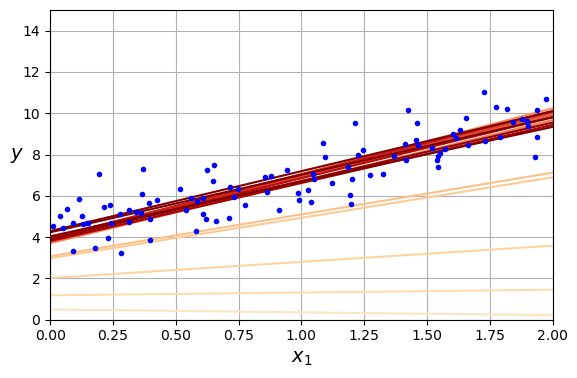

In [40]:
n_epochs = 50
t0, t1 = 5, 50  # 학습 스케줄 하이퍼파라미터

def learning_schedule(t):
    return t0 / (t + t1)

np.random.seed(42)
theta = np.random.randn(2, 1)  # 랜덤 초기화

n_shown = 20  # 추가 코드 - 아래 그림을 생성하는 데만 필요합니다.
plt.figure(figsize=(6, 4))  # 추가 코드

for epoch in range(n_epochs):
    for iteration in range(m):

        # 추가 코드 - 이 네 라인은 그림을 생성하는 데 사용됩니다.
        if epoch == 0 and iteration < n_shown:
            y_predict = X_new_b @ theta
            color = mpl.colors.rgb2hex(plt.cm.OrRd(iteration / n_shown + 0.15))
            plt.plot(X_new, y_predict, color=color)

        random_index = np.random.randint(m)
        xi = X_b[random_index : random_index + 1]
        yi = y[random_index : random_index + 1]
        gradients = 2 * xi.T @ (xi @ theta - yi)  # SGD의 경우 m으로 나누지 않습니다
        eta = learning_schedule(epoch * m + iteration)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)  # 추가 코드 - 그림을 생성하기 위해

# 추가 코드 - 이 섹션은 그림 4-10을 꾸미고 저장합니다.
plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()
save_fig("sgd_plot")
plt.show()

- 일반적으로 한 번의 에포크에서 훈련 세트를 한 번 모두 사용하며, 이는 전체 반복이 $m$번 이루어짐을 의미합니다. 
- 위 구현에서는 최적의 $\theta$ 값에 근접한 결과를 얻었습니다.

In [41]:
theta

array([[4.21076011],
       [2.74856079]])

 **중요사항**:
   - 샘플을 랜덤으로 선택하기 때문에 어떤 샘플은 여러 번 선택될 수 있고, 어떤 샘플은 선택되지 않을 수도 있습니다.
   - 최적화를 위해서는 모든 샘플이 동일한 확률로 선택될 수 있도록 섞어주는 것이 좋습니다.

**사이킷런의 SGD 방식**:
   - 사이킷런에서 제공하는 `SGDRegressor` 클래스를 사용하여 SGD를 쉽게 적용할 수 있습니다. 
   - 예를 들어, 최대 1,000번의 에포크 동안 실행하며 손실이 특정 허용 오차보다 작아지면 멈추도록 설정할 수 있습니다:

In [42]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-5, penalty=None, eta0=0.01,
                       n_iter_no_change=100, random_state=42)
sgd_reg.fit(X, y.ravel())  # fit()이 1D 타깃을 기대하기 때문에 y.ravel()로 씁니다

SGDRegressor(n_iter_no_change=100, penalty=None, random_state=42, tol=1e-05)

In [43]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.21278812]), array([2.77270267]))

## 미니배치 경사 하강법


**미니배치 경사 하강법(mini-batch gradient descent)**
   - **미니배치 경사 하강법**은 배치 경사 하강법과 확률적 경사 하강법의 중간 형태의 알고리즘입니다.
   - **배치 경사 하강법**: 전체 훈련 세트를 사용하여 그레디언트를 계산합니다.
   - **확률적 경사 하강법**: 하나의 샘플을 사용하여 그레디언트를 계산합니다.
   - **미니배치 경사 하강법**: 임의의 작은 샘플 세트(**미니배치**)를 사용하여 그레디언트를 계산합니다.

**미니배치 경사 하강법의 주요 장점**
   - **행렬 연산 최적화**: 행렬 연산에 최적화된 하드웨어, 특히 **GPU**를 사용하여 성능을 향상시킬 수 있습니다.
   - 미니배치 크기가 어느 정도 크면, 알고리즘이 파라미터 공간에서 확률적 경사 하강법(**SGD**)보다 덜 불규칙하게 움직입니다.
   - 결과적으로 **미니배치 경사 하강법**이 **SGD**보다 최솟값에 더 가까이 도달할 가능성이 큽니다.


**지역 최솟값 문제**
   - **미니배치 경사 하강법**은 지역 최솟값에서 빠져나오기 어려울 수 있습니다.
   - 예: **MSE** 비용 함수를 사용하는 선형 회귀의 경우, 지역 최솟값이 문제가 될 수 있습니다.
   - 이 방법은 작은 샘플 세트에 의존하기 때문에, 때로는 큰 변화 없이 안정된 경로를 따르는 경향이 있습니다. 그래서 함수의 여러 최솟값 중 하나인 지역 최솟값에 도달할 경우, 미니배치 경사 하강법은 그 지점에서 벗어나지 못할 수 있습니다.   

**학습 스케줄의 중요성**
   - **배치 경사 하강법**은 매 스텝에서 많은 시간이 소요되며, **확률적 경사 하강법**과 **미니배치 경사 하강법**에서도 적절한 학습 스케줄을 사용해야 최솟값에 도달할 수 있습니다.

이 섹션의 코드는 다음 그림을 생성하는 데 사용되며 책에는 나와 있지 않습니다.

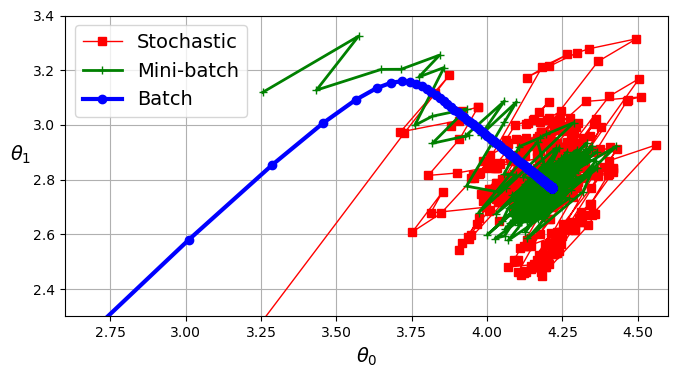

In [44]:
# 추가 코드 - 이 셀은 그림 4-11을 생성하고 저장합니다.

from math import ceil

n_epochs = 50
minibatch_size = 20
n_batches_per_epoch = ceil(m / minibatch_size)

np.random.seed(42)
theta = np.random.randn(2, 1)  # 랜덤 초기화

t0, t1 = 200, 1000  # 학습 스케줄 하이퍼파라미터

def learning_schedule(t):
    return t0 / (t + t1)

theta_path_mgd = []
for epoch in range(n_epochs):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for iteration in range(0, n_batches_per_epoch):
        idx = iteration * minibatch_size
        xi = X_b_shuffled[idx : idx + minibatch_size]
        yi = y_shuffled[idx : idx + minibatch_size]
        gradients = 2 / minibatch_size * xi.T @ (xi @ theta - yi)
        eta = learning_schedule(iteration)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

plt.figure(figsize=(7, 4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1,
         label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2,
         label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3,
         label="Batch")
plt.legend(loc="upper left")
plt.xlabel(r"$\theta_0$")
plt.ylabel(r"$\theta_1$   ", rotation=0)
plt.axis([2.6, 4.6, 2.3, 3.4])
plt.grid()
save_fig("gradient_descent_paths_plot")
plt.show()

**[그림 4-11]의 설명**
   - 세 가지 경사 하강법 알고리즘(배치, 확률적, 미니배치)이 훈련 과정 동안 파라미터 공간에서 움직인 경로를 보여줍니다.
   - **배치 경사 하강법**: 실제로 최솟값에서 멀어졌습니다.
   - **확률적 경사 하강법**과 **미니배치 경사 하강법**: 근접에서 맴돌며, 최솟값 근처에 도달했습니다.

<img src="img/tbl_04_01.png">

이 알고리즘들의 훈련 결과는 거의 차이가 없습니다. 모두 매우 비슷한 모델을 만들고 정확히 같은 방식으로 예측합니다.

# 다항 회귀

- 주어진 데이터가 단순한 직선보다 복잡한 형태라면 비선형 데이터를 학습하는 데 선형 모델을 사용할 수 있습니다.
- 이를 위해 각 특성의 거듭제곱을 새로운 특성으로 추가하고, 이 확장된 특성을 포함한 데이터셋에 선형 모델을 훈련시키는 방법을 사용합니다. 이러한 기법을 **다항 회귀(Polynomial Regression)** 라고 합니다.

In [45]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)

- **2차 방정식**: $ y = ax^2 + bx + c $
- 다음은 2차 방정식에 약간의 잡음을 추가한 비선형 데이터를 생성한 예입니다.

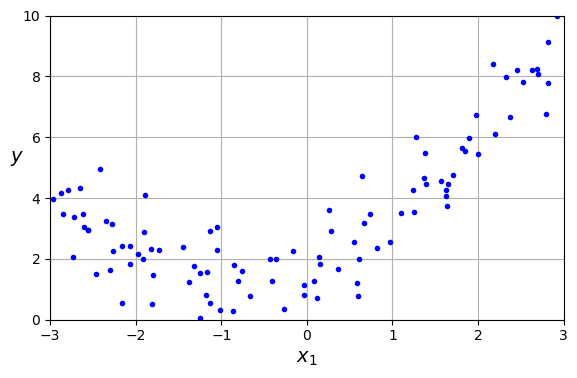

In [46]:
# 추가 코드 - 이 셀은 그림 4-12를 생성하고 저장합니다.
plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([-3, 3, 0, 10])
plt.grid()
save_fig("quadratic_data_plot")
plt.show()

- 위 코드에서 생성된 데이터는 직선으로 잘 맞지 않으므로, **사이킷런의 PolynomialFeatures**를 사용해 데이터를 변환합니다. 
- 변환 과정에서는 훈련 세트의 각 특성에 대해 2차 다항 특성을 추가합니다.

PolynomialFeatures 적용

- PolynomialFeatures를 사용하여 각 특성의 제곱을 포함한 새로운 특성을 만듭니다.

In [47]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-0.75275929])

In [48]:
X_poly[0]

array([-0.75275929,  0.56664654])

Linear Regression 모델 훈련

- 확장된 데이터셋에 대해 **Linear Regression**을 적용해 모델을 훈련시킵니다.

In [49]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

- 훈련된 모델의 **가중치**는 다음과 같습니다:
  - 절편: 1.78143581
  - 계수: [0.93366893, 0.56456263]

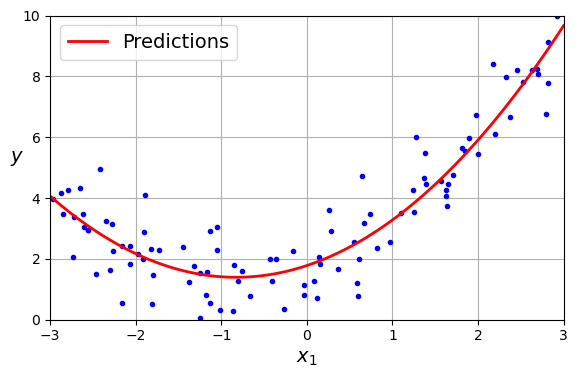

In [50]:
# 추가 코드 - 이 셀은 그림 4-13을 생성하고 저장합니다.

X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.legend(loc="upper left")
plt.axis([-3, 3, 0, 10])
plt.grid()
save_fig("quadratic_predictions_plot")
plt.show()

모델 예측 및 결과 분석

- 예측된 모델 식: $ \hat{y} = 0.5x_1^2 + 0.93x_1 + 1.78 $
- 이 모델은 실제 원래 함수와 매우 근접한 값을 예측합니다.

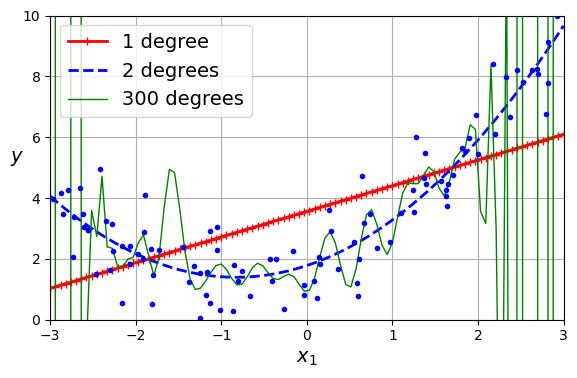

In [51]:
# extra code – this cell generates and saves Figure 4–14

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

plt.figure(figsize=(6, 4))

for style, width, degree in (("r-+", 2, 1), ("b--", 2, 2), ("g-", 1, 300)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = make_pipeline(polybig_features, std_scaler, lin_reg)
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    label = f"{degree} degree{'s' if degree > 1 else ''}"
    plt.plot(X_new, y_newbig, style, label=label, linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([-3, 3, 0, 10])
plt.grid()
save_fig("high_degree_polynomials_plot")
plt.show()

**다항 회귀의 특성**

- 다항 회귀는 여러 특성 간의 관계를 찾을 수 있습니다.
- **PolynomialFeatures**는 주어진 차수까지 특성 간의 모든 교차항을 추가합니다. 예를 들어, 두 개의 특성 $a$와 $b$가 있을 때, **degree=3**으로 설정하면 $a^2$, $a^3$, $b^2$, $b^3$ 뿐만 아니라 $ab$, $a^2b$, $ab^2$도 추가됩니다.

**주의사항**

- **PolynomialFeatures(degree=d)** 는 특성이 $n$개인 배열을 **$ (n + d)! / (d! \cdot n!) $** 개의 특성으로 변환합니다. 여기서 $ n! $은 **팩토리얼**로, 특성 수가 교차항을 포함해 엄청나게 늘어날 수 있으니 주의해야 합니다.

# 학습 곡선

- **개요**
    - 고차 다항 회귀를 적용하면 일반 선형 회귀보다 훈련 데이터에 더 잘 맞출 수 있음.
    - [그림 4-14]는 300차 다항 회귀 모델을 이전 훈련 데이터에 적용한 결과를 보여줌.
    - 단순한 선형 모델이나 2차 다항 회귀 모델과 비교해보면, 300차 다항 회귀 모델은 훈련 샘플에 거의 완벽하게 맞춰짐(과대적합의 결과).
    - 고차 다항 회귀 모델은 훈련 데이터에 과대적합되는 경향이 있으며, 반면에 선형 모델은 과소적합될 수 있음.
    - 이 경우 일반화가 잘 되는 모델은 2차 다항 회귀 모델임(2차 방정식으로 생성된 데이터).
    - 일반적으로 데이터가 어떤 함수로 생성되었는지 알 수 없는 상황에서는 모델의 복잡도를 결정하는 것이 중요함.

- 모델이 과대적합되었는지 과소적합되었는지 알아보려면 두 가지 방법이 있음:
  - 첫째, 교차 검증을 통해 훈련 데이터와 테스트 데이터에서의 성능을 비교.
  - 둘째, 학습 곡선을 확인.

- 학습 곡선
    - 학습 곡선은 모델의 훈련 오차와 검증 오차를 훈련 샘플의 함수로 나타낸 그래프임.
    - 학습 곡선을 통해 모델의 학습 과정에서 훈련 샘플이 늘어날 때 오차가 어떻게 변하는지를 알 수 있음.

- 학습 곡선을 그리기 위해 사이킷런의 `learning_curve()` 함수를 사용.
  - 이 함수는 훈련 샘플의 크기를 점진적으로 증가시키며 모델을 훈련시키고, 각 크기에서의 훈련 및 검증 오차를 반환함.
  - 모델이 점진적 학습을 지원하는 경우 `incremental_learning=True`로 설정하여 사용 가능.

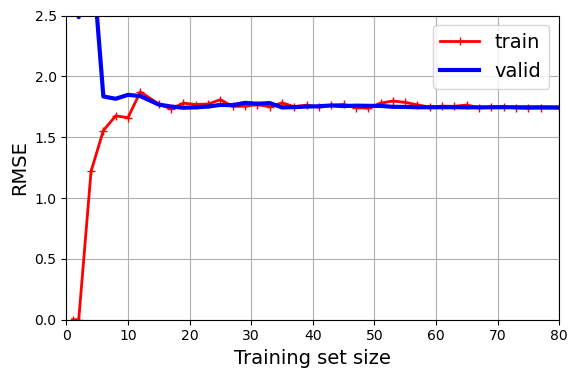

In [52]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(
    LinearRegression(), X, y, train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
    scoring="neg_root_mean_squared_error")
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.figure(figsize=(6, 4))  # 추가 코드
plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")

# 추가 코드 - 그림 4-15를 꾸미고 저장합니다.
plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.grid()
plt.legend(loc="upper right")
plt.axis([0, 80, 0, 2.5])
save_fig("underfitting_learning_curves_plot")

plt.show()

In [53]:
from sklearn.pipeline import make_pipeline

polynomial_regression = make_pipeline(
    PolynomialFeatures(degree=10, include_bias=False),
    LinearRegression())

train_sizes, train_scores, valid_scores = learning_curve(
    polynomial_regression, X, y, train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
    scoring="neg_root_mean_squared_error")

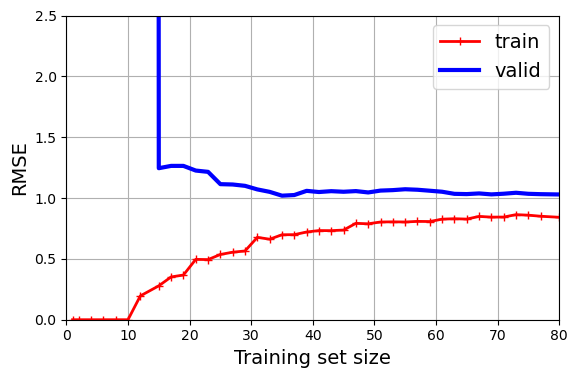

In [54]:
# 추가 코드 - 그림 4-16을 생성하고 저장합니다.

train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.figure(figsize=(6, 4))
plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")
plt.legend(loc="upper right")
plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.grid()
plt.axis([0, 80, 0, 2.5])
save_fig("learning_curves_plot")
plt.show()

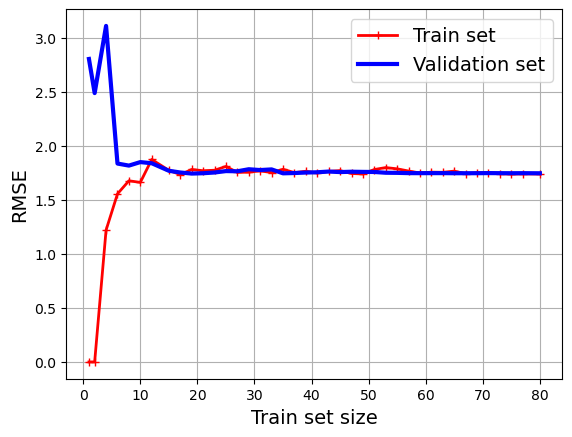

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LinearRegression

# 예제 데이터 생성 (이 부분은 코드에서 필요하므로 추가합니다)
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

# 학습 곡선 계산
train_sizes, train_scores, valid_scores = learning_curve(
    LinearRegression(), X, y, train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
    scoring="neg_root_mean_squared_error"
)

# 평균 오차 계산
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

# 학습 곡선 그리기
plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="Train set")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="Validation set")

# 레이블, 축, 그리드, 범례 추가
plt.xlabel("Train set size")
plt.ylabel("RMSE")
plt.legend(loc="upper right")
plt.grid(True)

# 그래프 보여주기
plt.show()

**과소적합 모델**:
   - 이 모델은 과소적합 임. 훈련 데이터가 부족하거나 모델이 지나치게 단순할 경우, 훈련 오차는 낮아지지만 검증 오차가 크게 나타나 과소적합이 발생합니다.
   - 훈련 오차는 훈련 데이터에 대한 모델의 성능을 나타내며, 훈련 세트가 증가하면 오차가 줄어드는 경향을 보입니다. 반면, 검증 오차는 초기에 매우 크지만 훈련 데이터가 많아지면서 감소하게 됩니다. 과소적합 모델은 검증 오차가 높은 상태에서 훈련 오차와 근접해집니다.

**과소적합된 모델의 해결 방법**:
   - 과소적합된 모델에 훈련 데이터를 추가해도 성능이 크게 향상되지 않습니다. 더 복잡한 모델을 사용하거나 더 나은 특징을 선택해야 합니다.

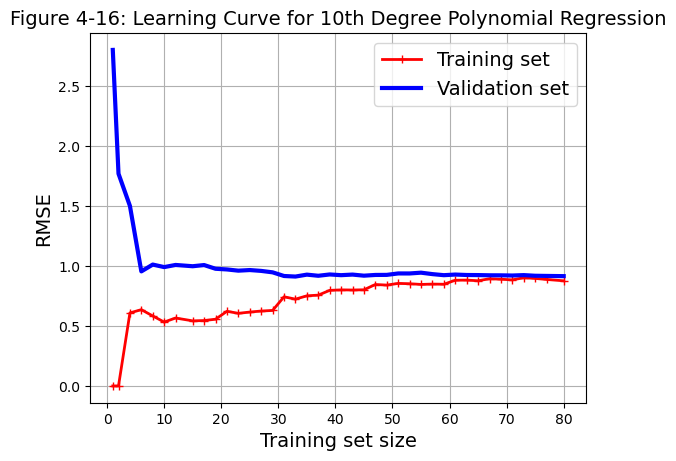

In [56]:
# 2차 다항 회귀 모델 생성
polynomial_regression = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False),
    LinearRegression()
)

# 학습 곡선 계산
train_sizes, train_scores, valid_scores = learning_curve(
    polynomial_regression, X, y, train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
    scoring="neg_root_mean_squared_error"
)

# 평균 오차 계산
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

# 학습 곡선 그리기
plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="Training set")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="Validation set")

# 레이블, 축, 그리드, 범례 추가
plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.title("Figure 4-16: Learning Curve for 10th Degree Polynomial Regression")
plt.legend(loc="upper right")
plt.grid(True)

# 그래프 보여주기
plt.show()

**과대적합의 예제**:
   - 학습 곡선에서 훈련 데이터의 오차가 이전보다 훨씬 낮습니다.
   - 두 곡선 사이에 공간이 있습니다. 이는 검증 데이터에서 훈련 데이터보다 모델의 성능이 더 나은 경우를 보여주며, 이는 과대적합 모델의 특징입니다. 그러나 더 큰 훈련 세트를 사용하면 두 곡선이 점점 가까워집니다.

**과대적합 모델 개선 방법**:
   - 과대적합 모델을 개선하는 방법 중 하나는 검증 오차가 훈련 오차에 근접할 때까지 더 많은 훈련 데이터를 추가하는 것입니다.

**편향/분산 트레이드오프**: 모델의 일반화 오차는 편향과 분산의 합으로 표현됨.
  - 편향: 데이터에 잘못된 가정을 할 때 발생하는 오류로, 편향이 큰 모델은 훈련 데이터에 과소적합되는 경향이 있음. (예: 데이터가 실제로는 2차인데 선형으로 가정)
  - 분산: 모델이 훈련 데이터에 있는 작은 변동에 민감하게 반응할 때 발생하는 오류로, 자유도가 높은 모델(예: 고차 다항 회귀 모델)은 높은 분산을 가지며, 이는 훈련 데이터에 과대적합될 가능성을 높임.
  - 줄일 수 없는 오차: 데이터 자체에 있는 잡음 때문에 발생하는 오류로, 이를 줄이는 유일한 방법은 데이터에서 잡음을 제거하는 것임.
  - 모델의 복잡도가 커지면 분산이 증가하고 편향은 줄어들며, 복잡도가 줄어들면 편향이 커지고 분산이 작아짐. 이를 [**트레이드오프**](https://datacookbook.kr/48)라고 부름.

# 규제가 있는 선형 모델

- 모델의 규제는 과대적합을 줄이는 좋은 방법
- 자유도를 줄이면, 데이터에 과대적합되기 더 어려워짐
    - 다항회귀 모델을 규제 하는 간단한 방법은 다항식의 차수를 줄이는 것
    - 선형 회귀 모델에서는 가중치를 제한 하여 규제 

## 릿지 회귀

**정의**:
   - 릿지 회귀(ridge regression) 또는 티호노프 규제(Tikhonov regularization)는 규제가 추가된 선형 회귀 버전입니다.
   - 규제항 $\frac{\alpha}{m}\sum_{i=1}^{n} \theta_{i}^{2}$이 MSE에 추가됩니다.
   - 이 규제항은 학습 알고리즘이 데이터에 과적합하지 않도록 모델의 가중치를 가능한 한 작게 유지합니다.
   - 모델의 훈련이 끝나면 성능을 규제가 없는 MSE(또는 RMSE)로 평가합니다.

**규제항의 역할**:
   - 하이퍼파라미터 $\alpha$는 모델을 얼마나 많이 규제할지를 조절합니다.
   - $\alpha = 0$이면 릿지 회귀는 선형 회귀와 동일해집니다.
   - $\alpha$가 클수록 가중치가 거의 0에 가까워지고 데이터의 평균을 지나는 수평선에 가까워집니다.

**식4-8**:
   - $J(\theta)$는 $MSE(\theta) + \frac{\alpha}{m}\sum_{i=1}^{n}\theta_{i}^{2}$
   - 이때, 편향 $ \theta_0 $는 규제되지 않으며, 가중치 벡터 $\mathbf{w}$의 $ \ell_2 $ 노름이 규제항에 추가됩니다.
   - 배치 경사 하강법을 사용할 때는 그레이디언트 벡터에 $2\alpha\mathbf{w}/m$을 더합니다.

**스케일링 필요성**:
   - 릿지 회귀는 입력 특성의 스케일에 민감하기 때문에, 수행 전에 데이터의 스케일을 조정하는 것이 중요합니다. 
   - 일반적으로 StandardScaler를 사용합니다.

매우 작고 잡음이 많은 선형 데이터셋을 생성해 보겠습니다:

In [57]:
# 추가 코드 - 이전에도 이러한 유형의 생성을 여러 번 수행한 적이 있습니다.
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

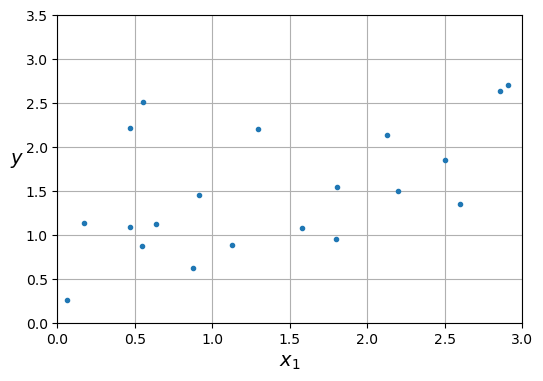

In [58]:
# 추가 코드 - 방금 생성한 데이터셋을 간단히 살펴보기
plt.figure(figsize=(6, 4))
plt.plot(X, y, ".")
plt.xlabel("$x_1$")
plt.ylabel("$y$  ", rotation=0)
plt.axis([0, 3, 0, 3.5])
plt.grid()
plt.show()

In [59]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=0.1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55325833]])

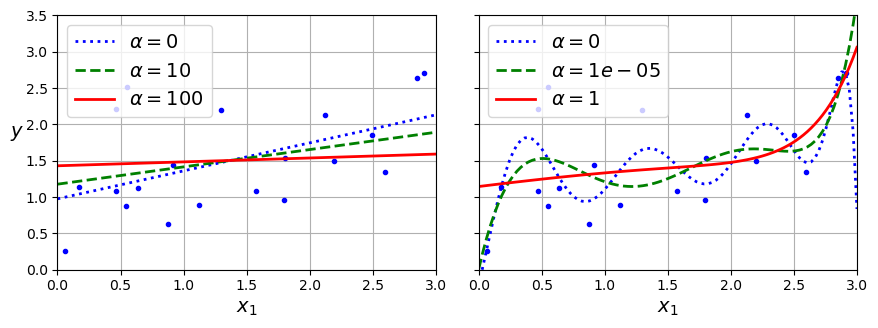

In [60]:
# 추가 코드 - 이 셀은 그림 4-17을 생성하고 저장합니다.

def plot_model(model_class, polynomial, alphas, **model_kwargs):
    plt.plot(X, y, "b.", linewidth=3)
    for alpha, style in zip(alphas, ("b:", "g--", "r-")):
        if alpha > 0:
            model = model_class(alpha, **model_kwargs)
        else:
            model = LinearRegression()
        if polynomial:
            model = make_pipeline(
                PolynomialFeatures(degree=10, include_bias=False),
                StandardScaler(),
                model)
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        plt.plot(X_new, y_new_regul, style, linewidth=2,
                 label=fr"$\alpha = {alpha}$")
    plt.legend(loc="upper left")
    plt.xlabel("$x_1$")
    plt.axis([0, 3, 0, 3.5])
    plt.grid()

plt.figure(figsize=(9, 3.5))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$  ", rotation=0)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)
plt.gca().axes.yaxis.set_ticklabels([])
save_fig("ridge_regression_plot")
plt.show()

**실험 결과**:
   - 다양한 $\alpha$ 값을 사용해 훈련한 릿지 모델의 예시. 
   - 왼쪽 그래프는 평범한 릿지 모델사용 선형적인 예측
   - 오른쪽은 `PolynomialFeatures(degree=10)`로 데이터 확장, `StandardScaler`로 스케질 조정 후 릿지 모델 적용
   - $\alpha$가 증가할수록 모델의 분산은 줄지만 편향은 커집니다.

**정규 방정식**:
   - 선형 회귀와 마찬가지로 정규 방정식을 사용해 릿지 회귀를 계산할 수 있습니다.
   - 수식으로는 $\hat{\theta} = (X^TX + \alpha A)^{-1}X^Ty$로 표현되며, 여기서 $A$는 (n+1) × (n+1) 단위 행렬입니다.

**구현 예제**:
   - `sklearn.linear_model`에서 `Ridge` 클래스를 사용해 릿지 회귀를 수행하는 예제.
   - 하이퍼파라미터와 솔버 등을 지정해 모델을 학습시키고 예측을 수행.

In [61]:
# 추가 코드 - 확률적 평균 GD(solver="sag")를 사용하면
# 이전과 거의 동일한 솔루션을 얻을 수 있음을 보여줍니다.
ridge_reg = Ridge(alpha=0.1, solver="sag", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55326019]])

- 확률적 경사 하강법 사용 결과

In [62]:
sgd_reg = SGDRegressor(penalty="l2", alpha=0.1 / m, tol=None,
                       max_iter=1000, eta0=0.01, random_state=42)
sgd_reg.fit(X, y.ravel())  # fit()은 1D 타겟을 기대하므로 y.ravel()을 사용합니다.
sgd_reg.predict([[1.5]])

array([1.55302613])

In [63]:
# 추가 코드 - 해석적으로 구한 릿지 회귀의 해를 보여주고
# 아래에서 릿지 모델의 학습된 파라미터와 비교합니다.
alpha = 0.1
A = np.array([[0., 0.], [0., 1.]])
X_b = np.c_[np.ones(m), X]
np.linalg.inv(X_b.T @ X_b + alpha * A) @ X_b.T @ y

array([[0.97898394],
       [0.3828496 ]])

In [64]:
ridge_reg.intercept_, ridge_reg.coef_  # 추가 코드

(array([0.97896386]), array([[0.38286422]]))

**확률적 경사 하강법(SGD)**:
   - SGD를 사용하여 릿지 회귀를 수행할 수 있습니다.
   - `SGDRegressor`를 사용하여 `penalty="l2"`로 설정하면 SGD가 MSE 비용 함수에 규제를 추가합니다.
   - alpha 값을 조정해 동일한 결과를 얻을 수 있습니다.

**주의사항 및 팁**
- RidgeCV 클래스도 릿지 회귀를 수행하며 교차 검증을 사용해 하이퍼파라미터를 자동으로 튜닝합니다.
- GridSearchCV와 비교해 실행 속도가 빠르고 최적화가 잘 되어 있습니다.
- 릿지 회귀 외에도 Lasso 및 ElasticNetCV와 같은 모델들도 존재합니다.

## 라쏘 회귀

- **라쏘 회귀 (Least Absolute Shrinkage and Selection Operator, LASSO)**
  - 라쏘 회귀는 선형 회귀의 또 다른 규제된 버전입니다.
  - 릿지 회귀처럼 비용 함수에 규제항을 더하지만 $\ell_2$ 노름 대신 가중치 벡터의 $\ell_1$ 노름을 사용합니다.
  - 식 4-10: 
  $
  J(\theta) = MSE(\theta) + 2\alpha \sum_{i=1}^{n} |\theta_i|
  $  
  - 릿지 회귀에서는 $\ell_2$ 노름에 $\alpha / m$을 곱했지만, 라쏘 회귀에서는 $\ell_1$ 노름에 $2\alpha$를 곱합니다.
  - 이는 최적의 $\alpha$ 값이 훈련 세트의 크기와 무관하도록 하기 위함입니다. 노름이 달라지면 곱셈 계수가 다를 수 있습니다 (자세한 내용은 사이킷런 이슈 \#15657 참고).
    - $\ell_1$ 노름은 $m$과 직접적인 관계가 없는 반면, $\ell_2$ 노름은 데이터 크기 $m$과 직접적으로 연관될 수 있습니다. 이는 $\ell_2$ 노름이 데이터의 크기에 따라 더 큰 값을 가질 수 있기 때문입니다.

In [65]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([1.53788174])

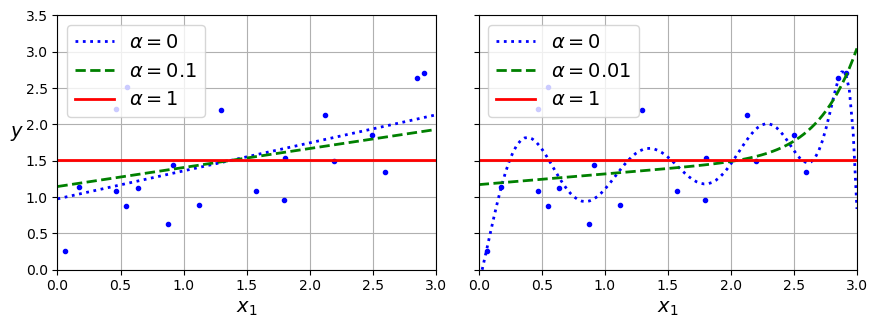

In [66]:
# 추가 코드 - 이 셀은 그림 4-18을 생성하고 저장합니다.
plt.figure(figsize=(9, 3.5))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1), random_state=42)
plt.ylabel("$y$  ", rotation=0)
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 1e-2, 1), random_state=42)
plt.gca().axes.yaxis.set_ticklabels([])
save_fig("lasso_regression_plot")
plt.show()

- **라쏘 회귀의 중요한 특성**
  - 불필요한 특성의 가중치를 제거함 (즉, 가중치가 0이 됩니다).
  - 예를 들어 그림 4-18의 오른쪽 그래프에서 접선($\alpha=0.01$)은 3차 방정식처럼 보입니다.
  - 차수가 높은 다항 특성의 가중치가 모두 0이 되었음.
  - 라쏘 회귀는 자동으로 특성 선택을 수행하고 희소 모델(sparse model)을 만듦 (즉, 0이 아닌 특성의 가중치가 적습니다).

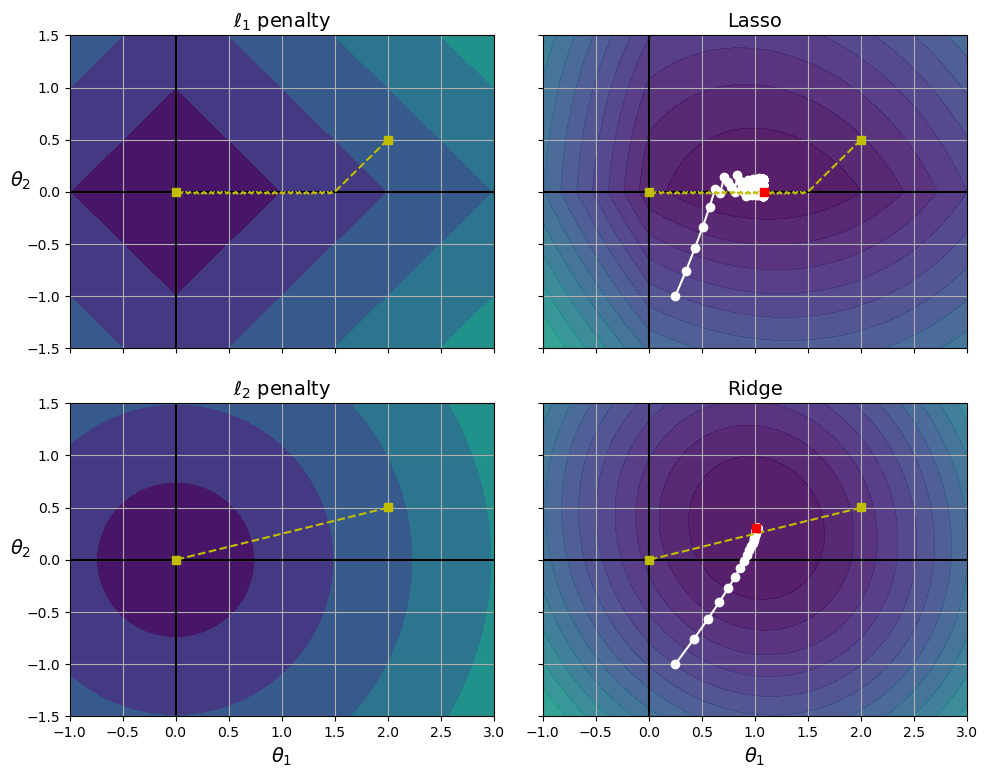

In [67]:
# 추가 코드 - 이 셀은 그림 4-19를 생성하고 저장합니다.

t1a, t1b, t2a, t2b = -1, 3, -1.5, 1.5

t1s = np.linspace(t1a, t1b, 500)
t2s = np.linspace(t2a, t2b, 500)
t1, t2 = np.meshgrid(t1s, t2s)
T = np.c_[t1.ravel(), t2.ravel()]
Xr = np.array([[1, 1], [1, -1], [1, 0.5]])
yr = 2 * Xr[:, :1] + 0.5 * Xr[:, 1:]

J = (1 / len(Xr) * ((T @ Xr.T - yr.T) ** 2).sum(axis=1)).reshape(t1.shape)

N1 = np.linalg.norm(T, ord=1, axis=1).reshape(t1.shape)
N2 = np.linalg.norm(T, ord=2, axis=1).reshape(t1.shape)

t_min_idx = np.unravel_index(J.argmin(), J.shape)
t1_min, t2_min = t1[t_min_idx], t2[t_min_idx]

t_init = np.array([[0.25], [-1]])

def bgd_path(theta, X, y, l1, l2, core=1, eta=0.05, n_iterations=200):
    path = [theta]
    for iteration in range(n_iterations):
        gradients = (core * 2 / len(X) * X.T @ (X @ theta - y)
                     + l1 * np.sign(theta) + l2 * theta)
        theta = theta - eta * gradients
        path.append(theta)
    return np.array(path)

fig, axes = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(10.1, 8))

for i, N, l1, l2, title in ((0, N1, 2.0, 0, "Lasso"), (1, N2, 0, 2.0, "Ridge")):
    JR = J + l1 * N1 + l2 * 0.5 * N2 ** 2

    tr_min_idx = np.unravel_index(JR.argmin(), JR.shape)
    t1r_min, t2r_min = t1[tr_min_idx], t2[tr_min_idx]

    levels = np.exp(np.linspace(0, 1, 20)) - 1
    levelsJ = levels * (J.max() - J.min()) + J.min()
    levelsJR = levels * (JR.max() - JR.min()) + JR.min()
    levelsN = np.linspace(0, N.max(), 10)

    path_J = bgd_path(t_init, Xr, yr, l1=0, l2=0)
    path_JR = bgd_path(t_init, Xr, yr, l1, l2)
    path_N = bgd_path(theta=np.array([[2.0], [0.5]]), X=Xr, y=yr,
                      l1=np.sign(l1) / 3, l2=np.sign(l2), core=0)
    ax = axes[i, 0]
    ax.grid()
    ax.axhline(y=0, color="k")
    ax.axvline(x=0, color="k")
    ax.contourf(t1, t2, N / 2.0, levels=levelsN)
    ax.plot(path_N[:, 0], path_N[:, 1], "y--")
    ax.plot(0, 0, "ys")
    ax.plot(t1_min, t2_min, "ys")
    ax.set_title(fr"$\ell_{i + 1}$ penalty")
    ax.axis([t1a, t1b, t2a, t2b])
    if i == 1:
        ax.set_xlabel(r"$\theta_1$")
    ax.set_ylabel(r"$\theta_2$", rotation=0)

    ax = axes[i, 1]
    ax.grid()
    ax.axhline(y=0, color="k")
    ax.axvline(x=0, color="k")
    ax.contourf(t1, t2, JR, levels=levelsJR, alpha=0.9)
    ax.plot(path_JR[:, 0], path_JR[:, 1], "w-o")
    ax.plot(path_N[:, 0], path_N[:, 1], "y--")
    ax.plot(0, 0, "ys")
    ax.plot(t1_min, t2_min, "ys")
    ax.plot(t1r_min, t2r_min, "rs")
    ax.set_title(title)
    ax.axis([t1a, t1b, t2a, t2b])
    if i == 1:
        ax.set_xlabel(r"$\theta_1$")

save_fig("lasso_vs_ridge_plot")
plt.show()

- **그림 4-19 분석**
  - 두 축은 모델 파라미터를 나타내며 등고선은 각기 다른 손실 함수를 나타냄.
  - 왼쪽 위 등고선은 $\ell_1$ 손실 ($|\theta_1| + |\theta_2|$)을 나타내며 축에 가까워질수록 선형적으로 줄어듦.
  - 오른쪽 위 그래프의 등고선은 라쏘 손실 함수를 나타내며 $\ell_1$ 손실을 더한 MSE 손실 함수.
  - 작은 원이 점차 하강하여 전역 최적점에 가까워짐.

- **라쏘 회귀와 릿지 규제 비교**
  - 아래 두 개의 그래프 모두 $\ell_2$ 페널티를 사용.
  - 왼쪽 그래프에서는 $\ell_2$ 손실은 원점에 가까워질수록 줄어듦.
  - 오른쪽 그래프는 릿지 회귀의 비용 함수를 나타냄.
  - 전역 최적점에 가까워질수록 그레디언트가 작아짐.
  - $\alpha$를 증가시키면 전역 최적점이 노란 접선을 따라 왼쪽으로 이동.
  - $\alpha$가 감소하면 전역 최적점이 오른쪽으로 이동.

- **라쏘 회귀의 서브그레이디언트 벡터**
  - 라쏘의 비용 함수는 $\theta_i = 0$일 때 미분 가능하지 않음.
  - 그러나 $\theta_i = 0$일 때 서브그레이디언트 벡터 $g$를 사용하면 경사 하강법 적용 가능.
      - 서브그레디언트 벡터는, 미분이 불가능한 지점 근방 그레디언트들의 중간값.
  - 식 4-11: 라쏘 회귀의 서브그레이디언트 벡터
  $
  g(\theta, J) = \nabla_{\theta} MSE(\theta) + \alpha
  \begin{pmatrix}
  \text{sign}(\theta_1) \\
  \text{sign}(\theta_2) \\
  \vdots \\
  \text{sign}(\theta_n)
  \end{pmatrix}
  $
  - 여기서 $\text{sign}(\theta_i)$는 다음과 같이 정의됨:
  $
  \text{sign}(\theta_i) =
  \begin{cases}
  -1 & \theta_i < 0 \\
   0 & \theta_i = 0 \\
   1 & \theta_i > 0
  \end{cases}
  $

- **간단한 사이킷런 예제**
  - Lasso 클래스를 사용하여 간단하게 라쏘 회귀를 구현 가능.

In [68]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([1.53788174])

  - 또한, Lasso 대신 `SGDRegressor(penalty="l1", alpha=0.1)`를 사용할 수도 있음.

## 엘라스틱넷

- **엘라스틱넷 회귀**는 **릿지 회귀**와 **라쏘 회귀**를 절충한 모델입니다.
  - 규제항은 릿지 회귀와 라쏘 회귀의 규제항을 단순히 더한 것입니다.
  - **혼합 비율 \(r\)** 로 혼합 정도를 조절합니다:
    - \(r = 0\)일 경우, 엘라스틱넷은 릿지 회귀와 동일합니다.
    - \(r = 1\)일 경우, 엘라스틱넷은 라쏘 회귀와 동일합니다.

- **식 4-12 엘라스틱넷 비용 함수**

  $
  J(\theta) = MSE(\theta) + r \left(2\alpha \sum_{i=1}^{n} |\theta_i|\right) + (1-r) \left(\frac{\alpha}{m} \sum_{i=1}^{n} \theta_i^2\right)
  $

- **모델 선택 가이드라인**
  - 엘라스틱넷 회귀, 릿지 회귀, 라쏘 회귀, 일반적인 선형 회귀(규제가 없는 모델) 중 어느 것을 사용할지 고민할 때, **릿지 회귀**는 대부분의 경우 좋은 기본 선택입니다.
  - 하지만, 특정 몇 가지 특성만 유용하다고 생각되거나 불필요한 특성의 가중치를 0으로 만들고 싶다면 **라쏘 회귀**나 **엘라스틱넷 회귀**가 더 나을 수 있습니다.
  - 특히, **특성의 수가 훈련 샘플 수보다 많거나, 특성들 간에 강한 연관성이 있는 경우**에는, 라쏘 회귀가 문제를 일으킬 수 있으므로, 이러한 경우 **엘라스틱넷 회귀**가 더 좋은 선택이 될 수 있습니다.

In [69]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([1.54333232])

## 조기 종료

- **조기 종료**는 경사 하강법 같은 반복적인 학습 알고리즘을 규제하는 방법입니다.
  - 검증 오차가 최소값에 도달하면 훈련을 즉시 중지시키는 방식입니다.
  - 이를 **조기 종료** (early stopping)라고 합니다.

앞서 사용한 2차방정식 데이터셋을 다시 사용합니다:

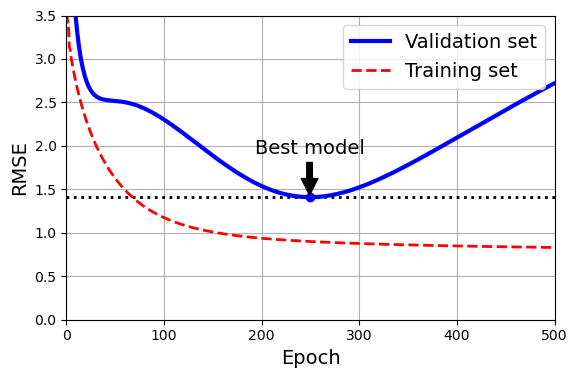

In [70]:
from copy import deepcopy
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# 추가 코드 - 이전과 동일한 2차방정식 데이터셋을 생성하고 분할합니다.
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)
X_train, y_train = X[: m // 2], y[: m // 2, 0]
X_valid, y_valid = X[m // 2 :], y[m // 2 :, 0]

preprocessing = make_pipeline(PolynomialFeatures(degree=90, include_bias=False),
                              StandardScaler())
X_train_prep = preprocessing.fit_transform(X_train)
X_valid_prep = preprocessing.transform(X_valid)
sgd_reg = SGDRegressor(penalty=None, eta0=0.002, random_state=42)
n_epochs = 500
best_valid_rmse = float('inf')
train_errors, val_errors = [], []  # 추가 코드 - 아래 그림을 위한 것입니다.

for epoch in range(n_epochs):
    sgd_reg.partial_fit(X_train_prep, y_train)
    y_valid_predict = sgd_reg.predict(X_valid_prep)
    val_error = mean_squared_error(y_valid, y_valid_predict, squared=False)
    if val_error < best_valid_rmse:
        best_valid_rmse = val_error
        best_model = deepcopy(sgd_reg)

    # 추가 코드 - 훈련 오차를 평가하여 그림에 저장합니다.
    y_train_predict = sgd_reg.predict(X_train_prep)
    train_error = mean_squared_error(y_train, y_train_predict, squared=False)
    val_errors.append(val_error)
    train_errors.append(train_error)

# 추가 코드 - 이 섹션에서는 그림 4-20을 생성하고 저장합니다.
best_epoch = np.argmin(val_errors)
plt.figure(figsize=(6, 4))
plt.annotate('Best model',
             xy=(best_epoch, best_valid_rmse),
             xytext=(best_epoch, best_valid_rmse + 0.5),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.plot([0, n_epochs], [best_valid_rmse, best_valid_rmse], "k:", linewidth=2)
plt.plot(val_errors, "b-", linewidth=3, label="Validation set")
plt.plot(best_epoch, best_valid_rmse, "bo")
plt.plot(train_errors, "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right")
plt.xlabel("Epoch")
plt.ylabel("RMSE")
plt.axis([0, n_epochs, 0, 3.5])
plt.grid()
save_fig("early_stopping_plot")
plt.show()

- **그림 4-20 설명**:
  - 그림 4-20에서는 2차 방정식 데이터셋에 배치 경사 하강법으로 훈련시킨 복잡한 모델(고차원 다항 회귀 모델)을 보여줍니다.
  - 에포크가 진행됨에 따라 알고리즘이 점차 학습되어, 훈련 세트에 대한 예측 오차(RMSE)와 검증 세트에 대한 예측 오차가 줄어듭니다.
  - 하지만 일정 지점 이후에는 검증 오차가 감소하다가 다시 증가하기 시작합니다. 이는 모델이 훈련 데이터에 과대적합되기 시작했음을 의미합니다.
  - 조기 종료는 검증 오차가 최소에 도달하는 즉시 훈련을 멈추는 규제 기법입니다.
  - 이 규제 기법은 매우 효과적이고 간단해서 제프리 힌튼이 ‘훌륭한 공짜 점심(beautiful free lunch)’이라고 불렀습니다.

- **Tip:**
  - 만약 훈련 검증 곡선이 야곱 방정식에서 곡선이 너무 빨리 평탄화되거나, 매우 고정적인 학습 곡선에서 안정화되지 않을 때, 이 문제를 해결하는 방법으로 조기 종료가 사용될 수 있습니다.

- **사이킷런을 사용한 조기 종료 구현 예제**:
  - 2차 방정식 데이터셋에서 `SGDRegressor`를 사용한 예제 코드:

  
  ```python
  from copy import deepcopy
  from sklearn.metrics import mean_squared_error
  from sklearn.preprocessing import StandardScaler

  X_train, y_train, X_valid, y_valid = [...]  # 2차 방정식 데이터셋을 나눕니다.

  preprocessing = make_pipeline(PolynomialFeatures(degree=90, include_bias=False),
                                StandardScaler())
  X_train_prep = preprocessing.fit_transform(X_train)
  X_valid_prep = preprocessing.transform(X_valid)
  sgd_reg = SGDRegressor(penalty=None, eta0=0.002, random_state=42, n_epochs=500)
  best_valid_rmse = float('inf')

  for epoch in range(n_epochs):
      sgd_reg.partial_fit(X_train_prep, y_train)
      y_valid_predict = sgd_reg.predict(X_valid_prep)
      val_error = mean_squared_error(y_valid, y_valid_predict, squared=False)
      if val_error < best_valid_rmse:
          best_valid_rmse = val_error
          best_model = deepcopy(sgd_reg)
  ```
  - 코드 설명:
    - 다항 특성을 추가하고, 훈련 세트와 검증 세트 모두에서 입력 특성의 스케일을 조정합니다.
    - `SGDRegressor` 모델을 사용하여 반복적으로 학습을 수행하고, 각 에포크에서 검증 세트의 RMSE를 측정하여, 지금까지 확인된 가장 낮은 RMSE보다 낮으면 `best_model` 변수에 모델의 복사본을 저장합니다.
    - 학습을 멈추지 않더라도, 이후 최상의 모델로 되돌릴 수 있도록 `deepcopy()`를 사용하여 모델을 복사하는 것이 중요합니다.
        - 모델의 하이퍼파라미터와 학습된 파라미터를 모두 복사 하기 때문


# 로지스틱 회귀

**로지스틱 회귀 개요**
- **로지스틱 회귀**는 특정 샘플이 특정 클래스에 속할 확률을 추정하는 데 널리 사용됩니다(**예: 이 이메일이 스팸일 확률**은 얼마나 될까요?).
- 모델은 추정된 확률이 **기본 임계값(일반적으로 50%)** 보다 크면 샘플이 해당 클래스에 속한다고 예측합니다(**즉, 레이블이 ‘1’인 양성 클래스**). 
- 그렇지 않으면 클래스에 속하지 않는다고 예측합니다(**즉, 레이블이 ‘0’인 음성 클래스**).
- 이를 **이진 분류**라고 합니다.

## 추정 확률

**확률 추정**
- **선형 회귀 모델**과 같이 로지스틱 회귀 모델은 입력 특징의 가중치 합을 계산합니다(그리고 편향을 더합니다). 
- 대신 선형 회귀처럼 바로 결과값을 출력하지 않고 결과값의 **로지스틱**을 출력합니다.(식4-13)
- 로지스틱 함수(σ(·)로 표시합니다)는 **0과 1 사이의 값을 출력**하는 **시그모이드 함수**입니다(**즉, S자 형태**입니다). 
- 이 함수는 [식 4-14] 및 [그림 4-21]과 같이 정의됩니다.


**식 4-13 로지스틱 회귀 모델의 확률 추정(벡터 표현식)**:

$
\hat{p} = h_{\theta}(\mathbf{x}) = \sigma(\theta^{T} \mathbf{x})
$

**식 4-14 로지스틱 함수**:

$
\sigma(t) = \frac{1}{1 + \exp(-t)}
$ 

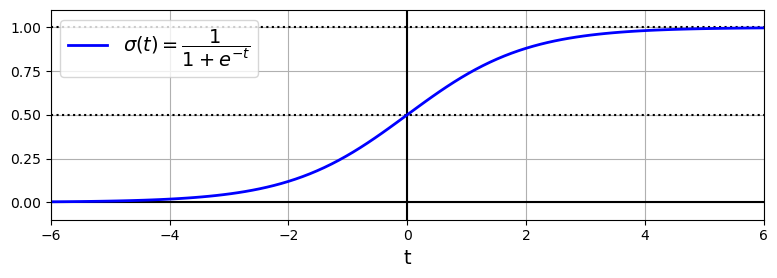

In [71]:
# 추가 코드 - 그림 4-21을 생성하고 저장합니다.

lim = 6
t = np.linspace(-lim, lim, 100)
sig = 1 / (1 + np.exp(-t))

plt.figure(figsize=(8, 3))
plt.plot([-lim, lim], [0, 0], "k-")
plt.plot([-lim, lim], [0.5, 0.5], "k:")
plt.plot([-lim, lim], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \dfrac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left")
plt.axis([-lim, lim, -0.1, 1.1])
plt.gca().set_yticks([0, 0.25, 0.5, 0.75, 1])
plt.grid()
save_fig("logistic_function_plot")
plt.show()

**로지스틱 함수와 예측**
- **로지스틱 함수(시그모이드 함수)**:
  - **식4-14**: $ \sigma(t) = \frac{1}{1 + e^{-t}} $
  - 이 함수는 **0에서 1 사이의 값을 출력**하며, 이는 **확률**을 나타냅니다.
- **예측**:
  - 확률 $ \hat{p} $가 **0.5 미만**이면 샘플은 **음성 클래스**로 분류됩니다.
  - $ \hat{p} $가 **0.5 이상**이면 샘플은 **양성 클래스**로 분류됩니다.
  - **[식 4-15]** 에 따라, t < 0이면 $ \sigma(t) $ < 0.5이고, t ≥ 0이면 $ \sigma(t) $ ≥ 0.5이므로 기본 임계값인 **50% 확률**을 사용하는 로지스틱 회귀 모델은 θ^T x가 양수일 때 1(**양성 클래스**)이라고 예측하고, 음수일 때 0(**음성 클래스**)이라고 예측합니다.
  
**로짓 함수**
- t를 **로짓(logit)** 이라고 부릅니다. **logit(p) = log(p / (1 − p))** 로 정의되는 로짓 함수가 로지스틱 함수의 역함수라는 사실에서 이름을 따왔습니다.
- 실제로 추정 확률 p의 로짓을 계산하면 t 값을 얻을 수 있습니다.
- 로짓을 **로그-오즈(log-odds)** 라고도 부릅니다. 로그-오즈는 **양성 클래스 추정 확률과 음성 클래스 추정 확률 사이의 로그 비율** 이기 때문입니다.

## 훈련과 비용 함수

- 훈련의 목적은 **양성 샘플(y = 1)** 에 대해서는 높은 확률을 추정하고 **음성 샘플(y = 0)** 에 대해서는 낮은 확률을 추정하는 모델의 **파라미터 벡터 θ** 를 찾는 것입니다.
- 이러한 아이디어를 하나의 훈련 샘플 x에 대한 **비용 함수** 인 [식 4-16]으로 요약할 수 있습니다.

**식 4-16 하나의 훈련 샘플에 대한 비용 함수**:

$
c(\theta) = 
\begin{cases} 
-log(\hat{p}) & \text{y = 1일 때} \\
-log(1 - \hat{p}) & \text{y = 0일 때} 
\end{cases}
$

- 이 비용 함수는 t가 0에 가까워지면 -log(t)가 매우 커지므로 타당하다고 볼 수 있습니다. 따라서 모델이 **양성 샘플을 0에 가까운 확률로 추정**하면 비용이 크게 증가할 것입니다. 
- 음성 샘플을 1에 가까운 확률로 추정해도 비용이 증가할 것입니다. 반면 t가 1에 가까우면 -log(t)는 0에 가까워집니다.
- 따라서 기대한 대로 **음성 샘플의 확률을 0에 가깝게** 추정하거나 **양성 샘플의 확률을 1에 가깝게** 추정하면 비용은 0에 가까워질 것입니다.

- 전체 훈련 세트에 대한 비용 함수는 **모든 훈련 샘플의 비용을 평균한 값**입니다. 이를 **로그 손실(log loss)** 이라고 부르며 [식 4-17]처럼 하나의 식으로 쓸 수 있습니다.

**식 4-17 로지스틱 회귀의 비용 함수(로그 손실)**:

$
J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} \left[ y^{(i)} \log(\hat{p}^{(i)}) + (1 - y^{(i)}) \log(1 - \hat{p}^{(i)}) \right]
$

- **노테이션**: 양성 클래스 $y^{(i)}$ = 1이면 $1 - y^{(i)}$ = 0이 되어 $y^{(i)} \log(\hat{p}^{(i)})$만 남게 되고, 음성 클래스 $y^{(i)}$ = 0이면 $\log(1 - \hat{p}^{(i)})$만 남게 되어 [식 4-16]과 같게 됩니다. **로그 손실**은 **로지스틱 손실**이라고도 부릅니다.

- **CAUTION**: 
    - 로그 손실은 단순한 갑작스런 값이 아닙니다. 샘플이 해당 클래스의 평균을 중심으로 가우스 분포를 따른다고 가정할 때, 이 손실을 최소화하면 **최대 가능도(maximum likelihood)** 가 가장 높은 모델이 된다는 것을 **(베이즈 추론을 사용하여)** 수학적으로 증명할 수 있습니다. 
    - 로그 손실을 사용할 때 이것이 바로 암묵적인 가정입니다. 이 가정이 틀리더라도 모델은 대체로 괜찮을 것입니다.
    - 만약 지도 선형 회귀 모델을 훈련하기 위해 **MSE**를 사용할 때는 데이터가 순수한 선형성이 약간의 가우스 잡음이 있다고 암묵적으로 가정했습니다. 
    - 따라서 데이터가 선형적이지 않거나 **2차 방정식 데이터** 잡음이 가우스 분포를 따르지 않는 경우에 이상치가 기하급수적으로 줄어들지 않을 경우 모델이 편향될 수 있습니다.

**편도함수**
- 안타깝게도 이 비용 함수의 최솟값을 계산하는 **알려진 해**가 없습니다(**정규 방정식 같은 것이 없습니다**).
- 하지만 이 비용 함수는 볼록 함수이므로 **경사 하강법**(또는 다른 최적화 알고리즘)이 전역 최솟값을 찾는 것을 보장합니다(**학습률이 너무 크지 않고 충분히 기다릴 시간이 있다면 말입니다**).
- 이 비용 함수의 j번째 모델 파라미터 θj에 대해 **편미분**을 하면 [식 4-18]과 같습니다.

**식 4-18 로지스틱 비용 함수의 편도함수**:

$
\frac{\partial}{\partial \theta_j} J(\theta) = \frac{1}{m} \sum_{i=1}^{m} \left[ \left( \sigma(\theta^T \mathbf{x}^{(i)}) - y^{(i)} \right) x_j^{(i)} \right]
$

- 이 식은 [식 4-5]와 매우 비슷해 보입니다. 각 샘플에 대해 예측 오차를 계산하고 j번째 특징 값을 곱해서 모든 훈련 샘플에 대해 평균을 냅니다.
- 모든 편도함수를 포함한 **그래디언트 벡터**를 만들려면 **배치 경사 하강법** 알고리즘을 사용할 수 있습니다.
- 이제 로지스틱 회귀 모델을 훈련시키는 방법을 알게 되었습니다. 물론 확률적 경사 하강법은 한 번에 하나의 샘플을 사용하고, 미니배치 경사 하강법은 한 번에 하나의 미니배치를 사용합니다.

이상으로 첨부된 이미지에서 제공된 내용을 요약하고 식을 정리했습니다.

## 결정 경계

다음은 제공된 이미지를 바탕으로 정리된 내용입니다:

**결정 경계**

- **로지스틱 회귀**를 설명하기 위해 **붓꽃** 데이터셋을 사용하겠습니다. 이 데이터셋은 세 개의 품종인 **Iris-Setosa**, **Iris-Versicolor**, **Iris-Virginica**에 속하는 붓꽃 150개의 **꽃잎(petal)** 과 **꽃받침(sepal)** 의 너비와 길이를 담고 있습니다(그림 4-22).

- **꽃잎의 너비를 기준**으로 **Iris-Versicolor** 종을 감지하는 분류기를 만들어보겠습니다. 먼저 데이터를 로드하고 간단히 살펴봅시다:

In [72]:
from sklearn.datasets import load_iris
iris = load_iris(as_frame=True)
list(iris)

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [73]:
iris.data.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [74]:
iris.target.head(3)

0    0
1    0
2    0
Name: target, dtype: int64

In [75]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

- Iris-Virginica의 꽃잎 너비는 1.4~2.5cm에 분포합니다. 반면 다른 붓꽃의 꽃잎 너비는 일반적으로 더 작습니다. 꽃잎 너비가 **2cm 이상**인 꽃은 **Iris-Virginica**로 강하게 확신하며, 1cm 미만이면 Iris-Virginica가 아니라고 강하게 확신합니다.

- **결정 경계**는 꽃잎 너비가 **1.6cm 근방**에서 양쪽의 확률이 똑같이 50%가 되는 지점에 형성됩니다. 꽃잎 너비가 1.6cm보다 크면 Iris-Virginica로 분류하고, 그보다 작으면 아닐 것이라고 예측합니다(아주 확실하지는 않더라도).

데이터를 분할하고 훈련 세트에서 **로지스틱 회귀 모델**을 훈련시킵니다:

In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = iris.data[["petal width (cm)"]].values
y = iris.target_names[iris.target] == 'virginica'
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=42)

**꽃잎의 너비가 0~3cm**인 꽃에 대해 모델의 추정 확률을 계산해보겠습니다(그림 4-23):

In [77]:
from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)
list(iris)

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [78]:
print(iris.DESCR)  # 추가 코드 - 조금 깁니다.

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [79]:
iris.data.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [80]:
iris.target.head(3)  # 샘플이 섞여 있지 않습니다.

0    0
1    0
2    0
Name: target, dtype: int64

In [81]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = iris.data[["petal width (cm)"]].values
y = iris.target_names[iris.target] == 'virginica'
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=42)

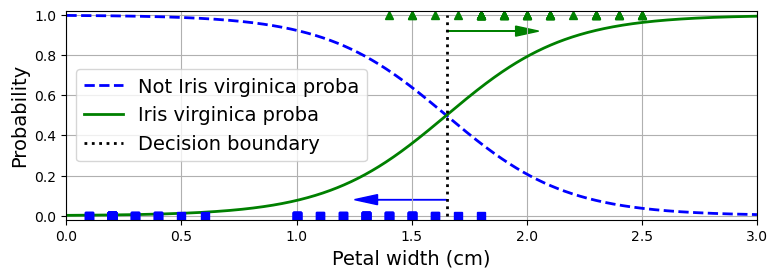

In [83]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)  # 크기를 바꾸어 열 벡터를 얻습니다.
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0, 0]

plt.figure(figsize=(8, 3))  # 추가 코드
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2,
         label="Not Iris virginica proba")
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica proba")
plt.plot([decision_boundary, decision_boundary], [0, 1], "k:", linewidth=2,
         label="Decision boundary")

# 추가 코드 - 이 섹션에서는 그림 4-23을 꾸미고 저장합니다.
plt.arrow(x=decision_boundary, y=0.08, dx=-0.3, dy=0,
          head_width=0.05, head_length=0.1, fc="b", ec="b")
plt.arrow(x=decision_boundary, y=0.92, dx=0.3, dy=0,
          head_width=0.05, head_length=0.1, fc="g", ec="g")
plt.plot(X_train[y_train == 0], y_train[y_train == 0], "bs")
plt.plot(X_train[y_train == 1], y_train[y_train == 1], "g^")
plt.xlabel("Petal width (cm)")
plt.ylabel("Probability")
plt.legend(loc="center left")
plt.axis([0, 3, -0.02, 1.02])
plt.grid()
save_fig("logistic_regression_plot")

plt.show()

- **그림 4-23**: 추정 확률과 결정 경계

이 코드는 꽃잎 너비에 따른 **Iris-Virginica**에 속할 확률과 속하지 않을 확률을 계산하며, 결정 경계를 시각화하여 보여줍니다. 

- **Iris-Virginica** 의 꽃잎 너비는 **1.4~2.5cm** 에 분포합니다.
- 다른 붓꽃은 일반적으로 **0.1~1.8cm** 사이의 꽃잎 너비를 가집니다.
- **꽃잎 너비가 2cm 이상** 인 경우 분류기는 해당 꽃을 **Iris-Virginica** 로 강하게 확신합니다.
- **꽃잎 너비가 1cm 미만** 이면 분류기는 해당 꽃이 **Iris-Virginica가 아니다** 라고 강하게 확신합니다.
- **1~2cm** 사이에서는 분류기가 두 클래스 사이를 명확히 구분하지 못합니다.

In [84]:
decision_boundary

1.6516516516516517

- **predict_proba()** 대신 **predict()** 메서드를 사용하면 가장 가능성 높은 클래스를 반환합니다.
- 양쪽 확률이 **50%**가 되는 **1.6cm 근방**에서 결정 경계가 형성됩니다.
  - **1.6cm** 보다 크면 분류기는 **Iris-Virginica** 로 분류합니다.
  - **1.6cm** 보다 작으면 분류기는 **Iris-Virginica가 아니다** 라고 예측합니다.
- **결정 경계** 는 **1.6516cm** 에 위치합니다.

In [85]:
log_reg.predict([[1.7], [1.5]])

array([ True, False])

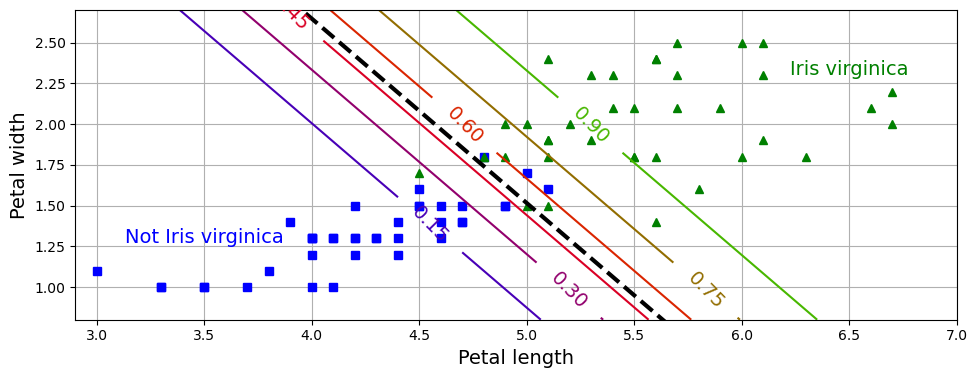

In [86]:
# 추가 코드 - 이 셀은 그림 4-24를 생성하고 저장합니다.

X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris.target_names[iris.target] == 'virginica'
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

log_reg = LogisticRegression(C=2, random_state=42)
log_reg.fit(X_train, y_train)

# 등고선 그래프
x0, x1 = np.meshgrid(np.linspace(2.9, 7, 500).reshape(-1, 1),
                     np.linspace(0.8, 2.7, 200).reshape(-1, 1))
X_new = np.c_[x0.ravel(), x1.ravel()]  # 그림의 포인트당 하나의 샘플
y_proba = log_reg.predict_proba(X_new)
zz = y_proba[:, 1].reshape(x0.shape)

# 결정 경계
left_right = np.array([2.9, 7])
boundary = -((log_reg.coef_[0, 0] * left_right + log_reg.intercept_[0])
             / log_reg.coef_[0, 1])

plt.figure(figsize=(10, 4))
plt.plot(X_train[y_train == 0, 0], X_train[y_train == 0, 1], "bs")
plt.plot(X_train[y_train == 1, 0], X_train[y_train == 1, 1], "g^")
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)
plt.clabel(contour, inline=1)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.27, "Not Iris virginica", color="b", ha="center")
plt.text(6.5, 2.3, "Iris virginica", color="g", ha="center")
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.axis([2.9, 7, 0.8, 2.7])
plt.grid()
save_fig("logistic_regression_contour_plot")
plt.show()

- **꽃잎 너비와 꽃잎 길이**라는 두 개의 특성을 기준으로 로지스틱 회귀 분류기가 훈련됩니다.
- 모델의 결정 경계는 선형입니다.
- **15%**(왼쪽 아래)부터 **90%**(오른쪽 위)까지의 확률을 나타내는 직선이 모델의 예측 확률을 시각적으로 표현합니다.
- 대부분의 경우, **오른쪽 위**의 직선을 넘는 꽃들은 **90%** 이상의 확률로 **Iris-Virginica**로 판단됩니다.

- [그림 4-24]는 꽃잎 너비와 꽃잎 길이라는 두 개의 특성을 기준으로 훈련이 끝난 로지스틱 회귀 분류기가 **Iris-Virginica**인지 확률을 추정할 수 있음을 보여줍니다. 접선은 모델이 50% 확률을 추정하는 지점으로, **결정 경계**입니다. 이 경계는 선형이라는 것에 주목하세요. 15%부터 90%까지 나타난 직선들은 모델의 특정 확률을 출력하는 포인트를 나타냅니다.

- **다른 선형 모델**처럼 로지스틱 회귀 모델도 $\ell_1$, $\ell_2$ 패널티를 사용하여 규제할 수 있습니다. **사이킷런**은 기본적으로 $\ell_2$ 패널티를 사용합니다.

**NOTE**: **사이킷런의 LogisticRegression** 모델의 규제 강도를 조절하는 **하이퍼파라미터**는 다른 선형 모델처럼 **alpha**가 아니고 그 역수에 해당하는 **C**입니다. **C**가 **높을수록 모델의 규제가 줄어듭니다.**

## 소프트맥스 회귀

**개요**
- **로지스틱 회귀 모델**은 여러 개의 이진 분류기를 훈련시키지 않고 직접 다중 클래스를 지원하도록 일반화할 수 있습니다. 이를 **소프트맥스 회귀(Softmax Regression)** 또는 **다항 로지스틱 회귀(Multinomial Logistic Regression)**라고 합니다.
- **소프트맥스 회귀**는 샘플이 주어지면 각 클래스에 대한 점수를 계산하고, 소프트맥스 함수를 적용해 각 클래스의 확률을 추정합니다.
- **점수 계산**: 각 클래스 $ k $에 대한 점수 $ s_k(\mathbf{x}) $는 파라미터 벡터 $ \theta^{(k)} $와 샘플 벡터 $ \mathbf{x} $의 내적입니다.
- **소프트맥스 함수**: 각 클래스의 점수에 지수 함수를 적용하고, 전체 지수 합으로 나누어 정규화합니다.

**소프트맥스 회귀의 수식**
- **식4-19 : 클래스 $ k $에 대한 소프트맥스 점수**:
  $
  s_k(\mathbf{x}) = \theta^{(k)T} \mathbf{x}
  $
- **식4-20 : 소프트맥스 함수**:
  $
  \hat{p}_k = \sigma(s(\mathbf{x}))_k = \frac{\exp(s_k(\mathbf{x}))}{\sum_{j=1}^{K} \exp(s_j(\mathbf{x}))}
  $
  - $ K $는 클래스 수를 의미합니다.
  - $ s(\mathbf{x}) $는 샘플에 대한 각 클래스의 점수를 담은 벡터입니다.
  - $ \sigma(s(\mathbf{x})) $는 샘플 $ \mathbf{x} $에 대한 각 클래스의 확률을 추정한 벡터입니다.

**소프트맥스 회귀의 예측**
- 소프트맥스 회귀 분류기는 **추정 확률이 가장 높은 클래스**를 선택합니다.
- **식4-21: 예측 수식**:

  $
  \hat{y} = \arg\max_k \sigma(s(\mathbf{x}))_k = \arg\max_k s_k(\mathbf{x}) = \arg\max_k \theta^{(k)T} \mathbf{x}
  $
- **argmax 연산**: 함수에서 가장 큰 값을 반환하는 변수를 선택합니다.

**TIP**: 소프트맥스 회귀의 특성
- 소프트맥스 회귀는 한 번에 하나의 클래스만 예측합니다(즉, 다중 클래스이지만 다중 출력이 아님).
- 따라서 종목이 다른 벡터와 같이 상호 배타적인 클래스에만 사용해야 합니다.

**크로스 엔트로피 비용 함수**
- 소프트맥스 회귀는 **크로스 엔트로피**를 비용 함수로 사용합니다.
- **식4-22: 크로스 엔트로피 비용 함수**:

  $
  J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} \sum_{k=1}^{K} y_k^{(i)} \log(\hat{p}_k^{(i)})
  $
  - 이 식에서 $ y_k^{(i)} $는 $ i $번째 샘플이 클래스 $ k $에 속할 타겟 확률입니다.
  - 이 값은 일반적으로 클래스에 속하면 1, 아니면 0이 됩니다.

**크로스 엔트로피에 대한 설명**
- **크로스 엔트로피**는 원래 **정보 이론**에서 유래된 개념입니다.
- **예시**: 날씨를 효율적으로 인코딩하기 위해 필요한 비트 수를 측정하는데 사용됩니다.
- **크로스 엔트로피**는 예측이 얼마나 정확한지 측정하며, 특정한 경우 **쿨백-라이블러 발산**과 관련이 있습니다.


**크로스 엔트로피의 그래디언트 벡터**
- **식4-23: 비용 함수** $ J(\theta) $의 파라미터 벡터 $ \theta^{(k)} $에 대한 그래디언트 벡터는 다음과 같이 계산됩니다:

  $
  \nabla_{\theta^{(k)}} J(\theta) = \frac{1}{m} \sum_{i=1}^{m} \left(\hat{p}_k^{(i)} - y_k^{(i)}\right) \mathbf{x}^{(i)}
  $
- 이 그래디언트를 사용하여 비용 함수를 최소화하고, 최적의 파라미터 행렬 $ \theta $를 찾기 위해 경사 하강법(또는 다른 최적화 알고리즘)을 사용할 수 있습니다.

**소프트맥스 회귀를 사용한 붓꽃 데이터 분류**
- **사이킷런의 LogisticRegression** 클래스는 두 개 이상의 클래스를 다룰 때 자동으로 소프트맥스 회귀를 사용합니다.
- **multi_class** 매개변수를 "multinomial"로 설정하면 소프트맥스 회귀가 활성화됩니다.
- **solver** 매개변수를 "lbfgs"와 같은 알고리즘으로 설정하여 소프트맥스 회귀를 사용할 수 있습니다.
- 하이퍼파라미터 $ C $를 사용하여 규제를 조정할 수 있으며, $ \ell_2 $ 규제가 기본적으로 적용됩니다.

In [87]:
from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

softmax_reg = LogisticRegression(C=30, random_state=42)
softmax_reg.fit(X_train, y_train)

LogisticRegression(C=30, random_state=42)

In [88]:
softmax_reg.predict([[5, 2]])

array([2])

In [89]:
softmax_reg.predict_proba([[5, 2]]).round(2)

array([[0.  , 0.04, 0.96]])

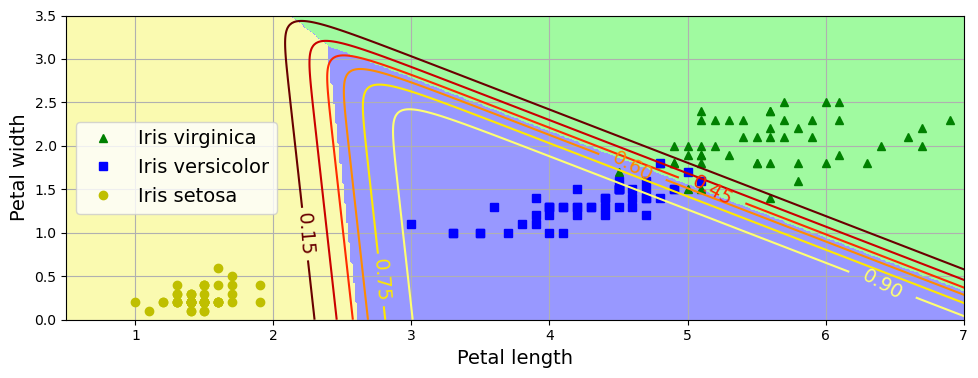

In [90]:
# 추가 코드 - 이 셀은 그림 4-25를 생성하고 저장합니다.

from matplotlib.colors import ListedColormap

custom_cmap = ListedColormap(["#fafab0", "#9898ff", "#a0faa0"])

x0, x1 = np.meshgrid(np.linspace(0, 8, 500).reshape(-1, 1),
                     np.linspace(0, 3.5, 200).reshape(-1, 1))
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y == 2, 0], X[y == 2, 1], "g^", label="Iris virginica")
plt.plot(X[y == 1, 0], X[y == 1, 1], "bs", label="Iris versicolor")
plt.plot(X[y == 0, 0], X[y == 0, 1], "yo", label="Iris setosa")

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap="hot")
plt.clabel(contour, inline=1)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="center left")
plt.axis([0.5, 7, 0, 3.5])
plt.grid()
save_fig("softmax_regression_contour_plot")
plt.show()

**소프트맥스 회귀의 시각화**
- **그림 4-25**: 소프트맥스 회귀 모델이 만든 결정 경계를 배경색으로 시각화합니다.
- 클래스 간의 결정 경계는 모두 선형입니다.
- **Iris-Versicolor** 클래스에 대한 확률은 곡선으로 나타나며, 30% 확률 경계를 나타냅니다.
- 모든 결정 경계가 만나는 지점에서는 모든 클래스가 동일하게 **33%** 의 확률을 가집니다.

# 연습문제

## 1번. 
- 수백만 개의 특성을 가진 훈련 세트에서는 어떤 선형 회귀 알고리즘을 사용할 수 있을까요?
    - 확률적 경사 하강법(SGD)이나 미니배치 경사 하강법은 많은 특성을 가진 데이터셋을 처리할 때 유용한 알고리즘입니다. 그 이유는 이 알고리즘들이 데이터를 한 번에 모두 처리하지 않고, 작은 부분씩 나누어 계산하기 때문입니다. 이렇게 하면 메모리 사용량이 적고, 계산도 빠르게 이루어집니다.
    - 반면에, 정규 방정식이나 SVD 방법은 데이터를 한꺼번에 처리하려고 합니다. 그런데 데이터의 특성(변수)이 너무 많으면 계산해야 할 양이 기하급수적으로 늘어나서, 이 방법들은 시간이 너무 오래 걸리거나, 메모리가 부족해져서 아예 계산을 못 할 수도 있습니다. 
    - 그래서 특성이 많을 때는 확률적 경사 하강법(SGD)이나 미니배치 경사 하강법을 사용하는 것이 더 효율적이고 실용적입니다.

## 2번. 
- 훈련 세트에 있는 특성들이 서로 다른 스케일을 가지고 있습니다. 이런 데이터에 잘 작동하지 않는 알고리즘은 무엇일까요? 그 이유는 무엇일까요? 이 문제를 어떻게 해결할 수 있을까요?
    - 경사 하강법(GD)은 스케일이 매우 다른 비율 함수로 인해 수렴하는 데 오랜 시간이 걸립니다. 이를 해결하려면 모델을 훈련하기 전에 데이터의 스케일을 조정해야 합니다.
    - 규제도 스케일을 조정해야 지역 최적점에 빠질 가능성이 낮아 진다.

## 3번. 
- 경사 하강법으로 로지스틱 회귀 모델을 훈련시킬 때 지역 최소값에 갇힐 가능성이 있을까요?
    - 로지스틱 회귀의 비용 함수는 볼록 함수이므로 경사 하강법이 훈련될 때 지역 최소값에 갇힐 가능성이 없습니다.

## 4번. 
- 충분히 오랫동안 실행하면 모든 경사 하강법 알고리즘이 같은 모델을 만들까요?
    - 학습률이 점진적으로 감소하지 않으면 SGD와 미니배치 GD는 진정한 최적점에 수렴하지 못하고 서로 다른 모델을 만들 수 있습니다.

## 5번. 
- 배치 경사 하강법을 사용하고 에포크마다 검증 오차를 그래프로 나타내봤습니다. 검증 오차가 일정하게 상승하고 있다면 어떤 일이 일어나고 있는 걸까요? 이 문제를 어떻게 해결할 수 있나요?
    - 학습률이 너무 높아서 알고리즘이 발산하기 때문일 수 있습니다. 학습률을 낮추어야 합니다.

## 6번. 
- 검증 오차가 상승하면 미니배치 경사 하강법을 즉시 중단하는 것이 좋은 방법일까요?
    - 도달하기 전에 너무 일찍 중단할 가능성이 있기 때문에 좋지 않은 방법입니다. 더 나은 방법은 정기적으로 모델을 저장하고 오버피팅의 징후가 보이면 최적화된 모델을 복원하는 것입니다.

## 7번. 
- (우리가 언급한 것 중에서) 어떤 경사 하강법 알고리즘이 가장 빠르게 최적 솔루션에 근접할까요? 실제로 수렴하는 것은 어떤 것인가요? 다른 방법들도 수렴하게 만들 수 있나요?
    - 확률적 경사 하강법(SGD)이 가장 빠르게 최적점 근처에 도달합니다. 충분히 오랜 시간이 주어지면 배치 경사 하강법도 실제로 수렴할 수 있습니다.

## 8번. 
- 다항 회귀를 사용했을 때 학습 곡선을 보니 훈련 오차와 검증 오차 사이에 간격이 큽니다. 무슨 일이 생긴 걸까요? 이 문제를 해결하는 세 가지 방법은 무엇인가요?
    - 과대적합된 상태입니다. 해결 방법:
        - 다항 차수를 낮춥니다.
        - 모델에 규제를 가합니다.
        - 훈련 세트의 크기를 증가시킵니다.

## 9번. 
- 릿지 회귀를 사용했을 때 훈련 오차와 검증 오차가 거의 비슷하고 둘 다 높았습니다. 이 모델에는 높은 편향이 문제일까요, 아니면 높은 분산이 문제일까요? 규제 하이퍼파라미터 $\alpha$ 를 증가시켜야 할까요, 아니면 줄여야 할까요?
    - 과소적합, 즉 높은 편향이 문제입니다. 따라서 $\alpha$를 감소시켜야 합니다.

## 10번. 
- 다음과 같이 사용해야 하는 이유는 무엇인가요?
    - a. 평범한 선형 회귀(즉, 아무런 규제가 없는 모델) 대신 릿지 회귀
        - 규제가 있는 릿지 회귀는 일반적으로 규제가 없는 선형 회귀보다 성능이 좋습니다.
    - b. 릿지 회귀 대신 라쏘 회귀
        - 라쏘 회귀는 일부 특성의 가중치를 0으로 만들 수 있어 불필요한 특성을 제거하는 데 유용합니다.
    - c. 라쏘 회귀 대신 엘라스틱넷 회귀
        - **엘라스틱넷 회귀**는 라쏘 회귀와 릿지 회귀의 장점을 결합한 모델입니다. 이 모델은 특히 여러 특성이 강하게 연관되어 있거나, 특성의 수가 훈련 샘플보다 많을 때 더 안정적으로 동작합니다. 엘라스틱넷에서는 $\ell_1$과 $\ell_2$ 규제의 비율을 조정할 수 있는 하이퍼파라미터 $l1\_ratio$가 있으며, 이 값을 1에 가깝게 설정하면 라쏘 회귀와 유사하게 동작합니다. 

## 11번. 
- 사진을 낮과 밤, 실내와 실외로 분류하려 합니다. 두 개의 로지스틱 회귀 분류기를 만들어야 할까요, 아니면 하나의 소프트맥스 회귀 분류기를 만들어야 할까요?
    - 네 가지 조합이 모두 가능하므로 두 개의 로지스틱 회귀 분류기를 훈련시켜야 합니다.

## 12번. 
- 사이킷런을 사용하지 않고 넘파이만 사용하여 조기 종료를 사용한 배치 경사 하강법으로 소프트맥스 회귀를 구현해보세요. 이를 붓꽃 데이터셋 같은 분류 작업에 사용해보세요.

데이터를 로드하는 것부터 시작하겠습니다. 앞서 로드한 붓꽃 데이터셋을 재사용하겠습니다.

In [91]:
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris["target"].values

모든 샘플에 대해 편향 항을 추가해야 합니다($x_0 = 1$). 이 작업을 수행하는 가장 쉬운 옵션은 사이킷런의 `add_dummy_feature()` 함수를 사용하는 것이지만, 이 연습의 요점은 알고리즘을 수동으로 구현하여 알고리즘을 더 잘 이해하도록 하는 것입니다. 그래서 한 가지 가능한 구현은 다음과 같습니다:

In [92]:
X_with_bias = np.c_[np.ones(len(X)), X]

데이터셋을 훈련 세트, 검증 세트 및 테스트 세트로 분할하는 가장 쉬운 옵션은 사이킷런의 `train_test_split()` 함수를 사용하는 것이지만, 이 역시 수동으로 수행합니다:

In [93]:
test_ratio = 0.2
validation_ratio = 0.2
total_size = len(X_with_bias)

test_size = int(total_size * test_ratio)
validation_size = int(total_size * validation_ratio)
train_size = total_size - test_size - validation_size

np.random.seed(42)
rnd_indices = np.random.permutation(total_size)

X_train = X_with_bias[rnd_indices[:train_size]]
y_train = y[rnd_indices[:train_size]]
X_valid = X_with_bias[rnd_indices[train_size:-test_size]]
y_valid = y[rnd_indices[train_size:-test_size]]
X_test = X_with_bias[rnd_indices[-test_size:]]
y_test = y[rnd_indices[-test_size:]]

현재 타깃은 클래스 인덱스(0, 1 또는 2)이지만, 소프트맥스 회귀 모델을 훈련하려면 타깃 클래스 확률이 필요합니다. 각 샘플은 확률이 1.0인 타깃 클래스를 제외한 모든 클래스에 대해 0.0인 타깃 클래스 확률을 갖습니다(즉, 주어진 샘플에 대한 클래스 확률 벡터는 원-핫 벡터입니다). 클래스 인덱스 벡터를 각 샘플에 대한 원-핫 벡터를 포함하는 행렬로 변환하는 작은 함수를 작성해 보겠습니다. 이 코드를 이해하려면 `np.diag(np.ones(n))`가 주 대각선의 1을 제외한 0으로 가득 찬 n×n 행렬을 생성한다는 사실을 알아야 합니다. 또한 `a`가 넘파이 배열인 경우 `a[[1, 3, 2]]`는 `a[1]`, `a[3]` 및 `a[2]`와 동일한 3개의 행을 가진 배열을 반환합니다(이것이 [고급 넘파이 인덱싱](https://numpy.org/doc/stable/user/basics.indexing.html#advanced-indexing)입니다).

In [94]:
def to_one_hot(y):
    return np.diag(np.ones(y.max() + 1))[y]

처음 10개의 샘플에서 이 함수를 테스트해 보겠습니다:

In [95]:
y_train[:10]

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1])

In [96]:
to_one_hot(y_train[:10])

array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.]])

이제 훈련 세트와 테스트 세트에 대한 타깃 클래스 확률 행렬을 생성해 보겠습니다:

In [97]:
Y_train_one_hot = to_one_hot(y_train)
Y_valid_one_hot = to_one_hot(y_valid)
Y_test_one_hot = to_one_hot(y_test)

이제 입력의 스케일을 조정해 보겠습니다. 훈련 세트에서 (편향은 제외한) 각 특성의 평균과 표준 편차를 계산한 다음 훈련 세트, 검증 세트 및 테스트 세트에서 각 특성을 중앙에 맞추고 스케일을 조정합니다:

In [98]:
mean = X_train[:, 1:].mean(axis=0)
std = X_train[:, 1:].std(axis=0)
X_train[:, 1:] = (X_train[:, 1:] - mean) / std
X_valid[:, 1:] = (X_valid[:, 1:] - mean) / std
X_test[:, 1:] = (X_test[:, 1:] - mean) / std

이제 소프트맥스 함수를 구현해 보겠습니다. 다음 방정식으로 정의된다는 것을 기억하세요:

$\sigma\left(\mathbf{s}(\mathbf{x})\right)_k = \dfrac{\exp\left(s_k(\mathbf{x})\right)}{\sum\limits_{j=1}^{K}{\exp\left(s_j(\mathbf{x})\right)}}$

In [99]:
def softmax(logits):
    exps = np.exp(logits)
    exp_sums = exps.sum(axis=1, keepdims=True)
    return exps / exp_sums

훈련을 시작할 준비가 거의 다 되었습니다. 입력과 출력의 수를 정의해 보겠습니다:

In [100]:
n_inputs = X_train.shape[1]  # == 3 (2개의 특성과 편향)
n_outputs = len(np.unique(y_train))  # == 3 (3개의 붓꽃 클래스)

이제 가장 어려운 부분인 훈련입니다! 이론적으로는 간단합니다. 수학 방정식을 파이썬 코드로 변환하기만 하면 됩니다. 하지만 실제로는 상당히 까다로울 수 있습니다. 특히 항의 순서나 인덱스가 혼동되기 쉽습니다. 심지어 제대로 작동하는 것처럼 보이지만 실제로는 정확히 계산되지 않는 코드가 나올 수도 있습니다. 확실하지 않은 경우 방정식의 각 항의 크기를 적어두고 코드의 해당 항이 정확히 일치하는지 확인해야 합니다. 각 항을 독립적으로 평가하고 인쇄하는 것도 도움이 될 수 있습니다. 좋은 소식은 이 모든 것이 사이킷런에 의해 잘 구현되어 있기 때문에 매일 이 작업을 수행할 필요는 없지만, 내부에서 무슨 일이 일어나고 있는지 이해하는 데 도움이 된다는 것입니다.

따라서 우리에게 필요한 방정식은 비용 함수입니다:

$J(\mathbf{\Theta}) =
- \dfrac{1}{m}\sum\limits_{i=1}^{m}\sum\limits_{k=1}^{K}{y_k^{(i)}\log\left(\hat{p}_k^{(i)}\right)}$

그리고 그레이디언트 방정식입니다:

$\nabla_{\mathbf{\theta}^{(k)}} \, J(\mathbf{\Theta}) = \dfrac{1}{m} \sum\limits_{i=1}^{m}{ \left ( \hat{p}^{(i)}_k - y_k^{(i)} \right ) \mathbf{x}^{(i)}}$

$\hat{p}_k^{(i)} = 0$일 때 $\log\left(\hat{p}_k^{(i)}\right)$는 계산할 수 없습니다. 따라서 $\log\left(\hat{p}_k^{(i)}\right)$에 작은 값 $\epsilon$을 더해 `nan` 값을 피합니다.

In [101]:
eta = 0.5
n_epochs = 5001
m = len(X_train)
epsilon = 1e-5

np.random.seed(42)
Theta = np.random.randn(n_inputs, n_outputs)

for epoch in range(n_epochs):
    logits = X_train @ Theta
    Y_proba = softmax(logits)
    if epoch % 1000 == 0:
        Y_proba_valid = softmax(X_valid @ Theta)
        xentropy_losses = -(Y_valid_one_hot * np.log(Y_proba_valid + epsilon))
        print(epoch, xentropy_losses.sum(axis=1).mean())
    error = Y_proba - Y_train_one_hot
    gradients = 1 / m * X_train.T @ error
    Theta = Theta - eta * gradients

0 3.7085808486476917
1000 0.14519367480830647
2000 0.1301309575504088
3000 0.12009639326384532
4000 0.11372961364786881
5000 0.11002459532472425


이게 다입니다! 소프트맥스 모델이 학습되었습니다. 모델 파라미터를 살펴봅시다:

In [102]:
Theta

array([[ 0.41931626,  6.11112089, -5.52429876],
       [-6.53054533, -0.74608616,  8.33137102],
       [-5.28115784,  0.25152675,  6.90680425]])

검증 세트에 대한 예측을 수행하고 정확도 점수를 확인해 보겠습니다:

In [103]:
logits = X_valid @ Theta
Y_proba = softmax(logits)
y_predict = Y_proba.argmax(axis=1)

accuracy_score = (y_predict == y_valid).mean()
accuracy_score

0.9333333333333333

이 모델은 꽤 괜찮아 보입니다. 연습을 위해 약간의 $\ell_2$ 정규화를 추가해 보겠습니다. 다음 훈련 코드는 위의 코드와 유사하지만 손실에 $\ell_2$ 페널티가 추가되고 그레이디언트가 적절한 추가 항을 가집니다(`Theta`의 첫 번째 원소는 편향에 해당하므로 규제하지 않음). 또한 학습률 `eta`를 높여 보겠습니다.

In [104]:
eta = 0.5
n_epochs = 5001
m = len(X_train)
epsilon = 1e-5
alpha = 0.01  # 규제 하이퍼파라미터

np.random.seed(42)
Theta = np.random.randn(n_inputs, n_outputs)

for epoch in range(n_epochs):
    logits = X_train @ Theta
    Y_proba = softmax(logits)
    if epoch % 1000 == 0:
        Y_proba_valid = softmax(X_valid @ Theta)
        xentropy_losses = -(Y_valid_one_hot * np.log(Y_proba_valid + epsilon))
        l2_loss = 1 / 2 * (Theta[1:] ** 2).sum()
        total_loss = xentropy_losses.sum(axis=1).mean() + alpha * l2_loss
        print(epoch, total_loss.round(4))
    error = Y_proba - Y_train_one_hot
    gradients = 1 / m * X_train.T @ error
    gradients += np.r_[np.zeros([1, n_outputs]), alpha * Theta[1:]]
    Theta = Theta - eta * gradients

0 3.7372
1000 0.3259
2000 0.3259
3000 0.3259
4000 0.3259
5000 0.3259


추가 $\ell_2$ 페널티로 인해 손실이 이전보다 더 커 보이지만 이 모델이 더 나은 성과를 낼 수 있을까요? 알아봅시다:

In [105]:
logits = X_valid @ Theta
Y_proba = softmax(logits)
y_predict = Y_proba.argmax(axis=1)

accuracy_score = (y_predict == y_valid).mean()
accuracy_score

0.9333333333333333

이 경우 $\ell_2$ 페널티로 인해 테스트 정확도가 변경되지 않았습니다. `alpha`를 미세 튜닝해 볼 수 있을까요?

이제 조기 종료를 추가해 보겠습니다. 이를 위해 모든 반복에서 검증 세트의 손실을 측정하고 오차가 증가하기 시작하면 중지하기만 하면 됩니다.

In [106]:
eta = 0.5
n_epochs = 50_001
m = len(X_train)
epsilon = 1e-5
C = 100  # 규제 하이퍼파라미터
best_loss = np.infty

np.random.seed(42)
Theta = np.random.randn(n_inputs, n_outputs)

for epoch in range(n_epochs):
    logits = X_train @ Theta
    Y_proba = softmax(logits)
    Y_proba_valid = softmax(X_valid @ Theta)
    xentropy_losses = -(Y_valid_one_hot * np.log(Y_proba_valid + epsilon))
    l2_loss = 1 / 2 * (Theta[1:] ** 2).sum()
    total_loss = xentropy_losses.sum(axis=1).mean() + 1 / C * l2_loss
    if epoch % 1000 == 0:
        print(epoch, total_loss.round(4))
    if total_loss < best_loss:
        best_loss = total_loss
    else:
        print(epoch - 1, best_loss.round(4))
        print(epoch, total_loss.round(4), "조기 종료!")
        break
    error = Y_proba - Y_train_one_hot
    gradients = 1 / m * X_train.T @ error
    gradients += np.r_[np.zeros([1, n_outputs]), 1 / C * Theta[1:]]
    Theta = Theta - eta * gradients

0 3.7372
281 0.3256
282 0.3256 조기 종료!


In [107]:
logits = X_valid @ Theta
Y_proba = softmax(logits)
y_predict = Y_proba.argmax(axis=1)

accuracy_score = (y_predict == y_valid).mean()
accuracy_score

0.9333333333333333

여전히 검증 정확도에는 변화가 없지만, 적어도 조기 중지로 인해 훈련 시간이 조금 단축되었습니다.

이제 전체 데이터셋에 대한 모델의 예측을 그래프로 그려 보겠습니다(모델에 주입하는 모든 특성의 크기를 조정하는 것을 잊지 마세요):

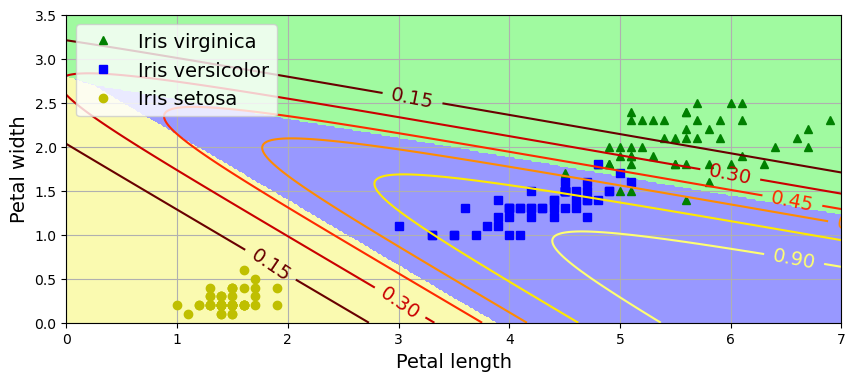

In [108]:
custom_cmap = mpl.colors.ListedColormap(['#fafab0', '#9898ff', '#a0faa0'])

x0, x1 = np.meshgrid(np.linspace(0, 8, 500).reshape(-1, 1),
                     np.linspace(0, 3.5, 200).reshape(-1, 1))
X_new = np.c_[x0.ravel(), x1.ravel()]
X_new = (X_new - mean) / std
X_new_with_bias = np.c_[np.ones(len(X_new)), X_new]

logits = X_new_with_bias @ Theta
Y_proba = softmax(logits)
y_predict = Y_proba.argmax(axis=1)

zz1 = Y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y == 2, 0], X[y == 2, 1], "g^", label="Iris virginica")
plt.plot(X[y == 1, 0], X[y == 1, 1], "bs", label="Iris versicolor")
plt.plot(X[y == 0, 0], X[y == 0, 1], "yo", label="Iris setosa")

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap="hot")
plt.clabel(contour, inline=1)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="upper left")
plt.axis([0, 7, 0, 3.5])
plt.grid()
plt.show()

이제 테스트 세트에서 최종 모델의 정확도를 측정해 보겠습니다:

In [109]:
logits = X_test @ Theta
Y_proba = softmax(logits)
y_predict = Y_proba.argmax(axis=1)

accuracy_score = (y_predict == y_test).mean()
accuracy_score

0.9666666666666667

테스트 세트에서 더 나은 성능을 얻었습니다. 이러한 변동성은 데이터셋의 크기가 매우 작기 때문일 수 있습니다. 훈련 세트, 검증 세트 및 테스트 세트의 샘플링 방법에 따라 상당히 다른 결과를 얻을 수 있습니다. 랜덤 시드를 변경하고 코드를 몇 번 다시 실행해 보면 결과가 달라지는 것을 확인할 수 있습니다.